In [ ]:
!pip uninstall PyMuPDF

In [ ]:
!pip install PyMuPDF

# Seção de Identificação de Autores

In [18]:
import fitz  # PyMuPDF
import re
import pandas as pd

In [19]:
# Função para extrair texto de um arquivo PDF
def extract_text_from_pdf(pdf_path):
    # Abrir o arquivo PDF
    with fitz.open(pdf_path) as pdf:
        text = ""
        # Iterar sobre cada página do PDF
        for page in pdf:
            # Extrair texto da página
            text += page.get_text()
    return text

# Função para identificar autores no texto extraído
def identify_authors(text):
    # Definir a expressão regular para encontrar autores
    author_pattern = re.compile(r'\b[A-Z][a-z]+(?: de| do| da| dos| das)*(?: [A-Z][a-z]+(?: de| do| da| dos| das)*)*\d+')
    #author_pattern = re.compile(r'\b[A-Z][a-z]+(?: de| do| da| dos| das)*(?:\s+[A-Z][a-z]+)*(?:\s+de|\s+do|\s+da|\s+dos|\s+das)*\s*\d+')
    # Encontrar todos os autores
    authors = author_pattern.findall(text)
    
    # Criar um DataFrame para armazenar os dados
    df_authors = pd.DataFrame({'Author': authors})

    return df_authors

# Caminho para o arquivo PDF
pdf_path = 'VIIIEPEM.pdf'  # Atualize com o caminho do seu arquivo PDF

# Extrair texto do PDF
extracted_text = extract_text_from_pdf(pdf_path)

# Definir a expressão regular para encontrar 'Figura' e 'Eixo'
padrao_para_remover = re.compile(r'\b(Figura|Eixo|Ano|Quadro|Financiamento|Professores|Even3|Geogebra 3|Max10|Min0|Meet4|Zoom|Whatsapp|:)\b')
# Substituir 'Figura' e 'Eixo' por string vazia
texto_atualizado = padrao_para_remover.sub('', extracted_text)

# Identificar autores e coautores
authors_df = identify_authors(texto_atualizado)

In [153]:
authors_df['level'] = '0'
display(authors_df)
Aux = authors_df

Author level
0          Diego Martins da Silva1     0
1         Paulo Henrique da Silva2     0
2       Ernani Martins dos Santos3     0
3    Reullyanne Freitas de Aguiar1     0
4             Raimundo Luna Neres2     0
..                             ...   ...
301         Josias Pedro da Silva3     0
302                        Morais1     0
303                Wilker Azevedo2     0
304                      Gitirana1     0
305                        Lucena2     0

[306 rows x 2 columns]

In [154]:
authors_df = Aux
# Exibir os resultados
n = len(authors_df['Author'].tolist())
for i in range(n):
    nome = authors_df['Author'][i]
    authors_df['Author'][i] = nome[:-1]
    authors_df['level'][i] = int(nome[-1])
    
display(authors_df)

Author level
0          Diego Martins da Silva     1
1         Paulo Henrique da Silva     2
2       Ernani Martins dos Santos     3
3    Reullyanne Freitas de Aguiar     1
4             Raimundo Luna Neres     2
..                            ...   ...
301         Josias Pedro da Silva     3
302                        Morais     1
303                Wilker Azevedo     2
304                      Gitirana     1
305                        Lucena     2

[306 rows x 2 columns]

In [184]:
# Suponha que authors_df seja o seu DataFrame e 'Authors' a coluna de interesse.
# Exemplo: authors_df = pd.DataFrame({'Authors': ['Diego Martins da Silva', 'Lfsantos2', 'Vol3', ...]})

# Lista de termos não-humanos para serem removidos
non_human_terms = [
    "Lfsantos2", "Vol3", "Issue", "Escolas", "Tabela", "Equivalentes",
    "Paris", "Covid1", "Investimento Catraca", "Swing Trade", "Aluno",
    "Programa Ensino Integral", "Forms", "Whatsapp", "Meet", "Zoom",
    "Powerpoint", "Google Meet", "Wing0", "Volce", "Max", "Geogebra",
    "Jabsoncs199","Geust200"
]

authors_df_filtered = authors_df.copy()

for var in non_human_terms:
    authors_df_filtered = authors_df_filtered[authors_df_filtered['Author'] != var]


authors_df_filtered = authors_df_filtered.reset_index()
# authors_df_filtered agora contém apenas linhas com nomes humanos na coluna 'Authors'.

# Filtrando para manter apenas linhas onde 'Author' contém mais de uma palavra
authors_df_filtered = authors_df_filtered[authors_df_filtered['Author'].str.contains(' ')].reset_index()


In [185]:
display(authors_df_filtered)

level_0  index                            Author level
0          0      0            Diego Martins da Silva     1
1          1      1           Paulo Henrique da Silva     2
2          2      2         Ernani Martins dos Santos     3
3          3      3      Reullyanne Freitas de Aguiar     1
4          4      4               Raimundo Luna Neres     2
..       ...    ...                               ...   ...
240      271    295   Luis Enrique Fernandes da Silva     1
241      274    299  Carlos Eduardo Ferreira Monteiro     1
242      275    300             Aldinete Silvino Lima     2
243      276    301             Josias Pedro da Silva     3
244      278    303                    Wilker Azevedo     2

[245 rows x 4 columns]

In [188]:
nome_procurado = 'Jerfesson Santos Moreira'

# Verifica se o nome está na lista
if nome_procurado in authors_df_filtered['Author'].tolist():
    print(f"{nome_procurado} está na lista de autores.")
else:
    print(f"{nome_procurado} NÃO está na lista de autores.")

Jerfesson Santos Moreira NÃO está na lista de autores.


In [186]:
authors_df_filtered['Author'].tolist()

['Diego Martins da Silva',
 'Paulo Henrique da Silva',
 'Ernani Martins dos Santos',
 'Reullyanne Freitas de Aguiar',
 'Raimundo Luna Neres',
 'Francisco Alexandre de Lima Sales',
 'Luciana Ferreira dos Santos',
 'Rosinalda Aurora de Melo Teles',
 'Silva Santos',
 'Iranete Maria da Silva Lima',
 'Edson Carlos Sobral de Sousa',
 'Costa da Silva',
 'Manoel Arthur Barbosa Correia',
 'Ivanildo Felisberto de Carvalho',
 'Henrique Batista de Oliveira',
 'Rodiney Marcelo Braga dos Santos',
 'Lucas da Silva Santos',
 'Vanessa da Silva Alves',
 'Sandra da Silva Santos',
 'Juliana Martins',
 'Cleide Oliveira Rodrigues',
 'Carlos Mometti',
 'Matheus Souza de Almeida',
 'Ross Alves do Nascimento',
 'Nascimento Moura',
 'Miky Wesley da Silva Santos',
 'Iranete Maria da Silva Lima',
 'Josias Pedro da Silva',
 'Aristides Bathke Junior',
 'Elcio Schuhmacher',
 'Egon Adahil Ferreira Martins',
 'Altomani Braga',
 'Joelson Pimentel de Almeida',
 'Marcelo Muniz',
 'Alberes Lopes de Lima',
 'Sidney Leandro

In [191]:
i = 0
authors_df_filtered['Article'] = 0
n = len(authors_df_filtered['Author'].tolist())
for var in range(n):
    if authors_df_filtered['level'][var] == 1:
        i = i + 1
    authors_df_filtered['Article'][var] = i
    
display(authors_df_filtered)

C:\Users\marci\AppData\Local\Temp\ipykernel_17332\3168930109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_df_filtered['Article'][var] = i


level_0  index                            Author level  Article
0          0      0            Diego Martins da Silva     1        1
1          1      1           Paulo Henrique da Silva     2        1
2          2      2         Ernani Martins dos Santos     3        1
3          3      3      Reullyanne Freitas de Aguiar     1        2
4          4      4               Raimundo Luna Neres     2        2
..       ...    ...                               ...   ...      ...
240      271    295   Luis Enrique Fernandes da Silva     1      112
241      274    299  Carlos Eduardo Ferreira Monteiro     1      113
242      275    300             Aldinete Silvino Lima     2      113
243      276    301             Josias Pedro da Silva     3      113
244      278    303                    Wilker Azevedo     2      113

[245 rows x 5 columns]

113


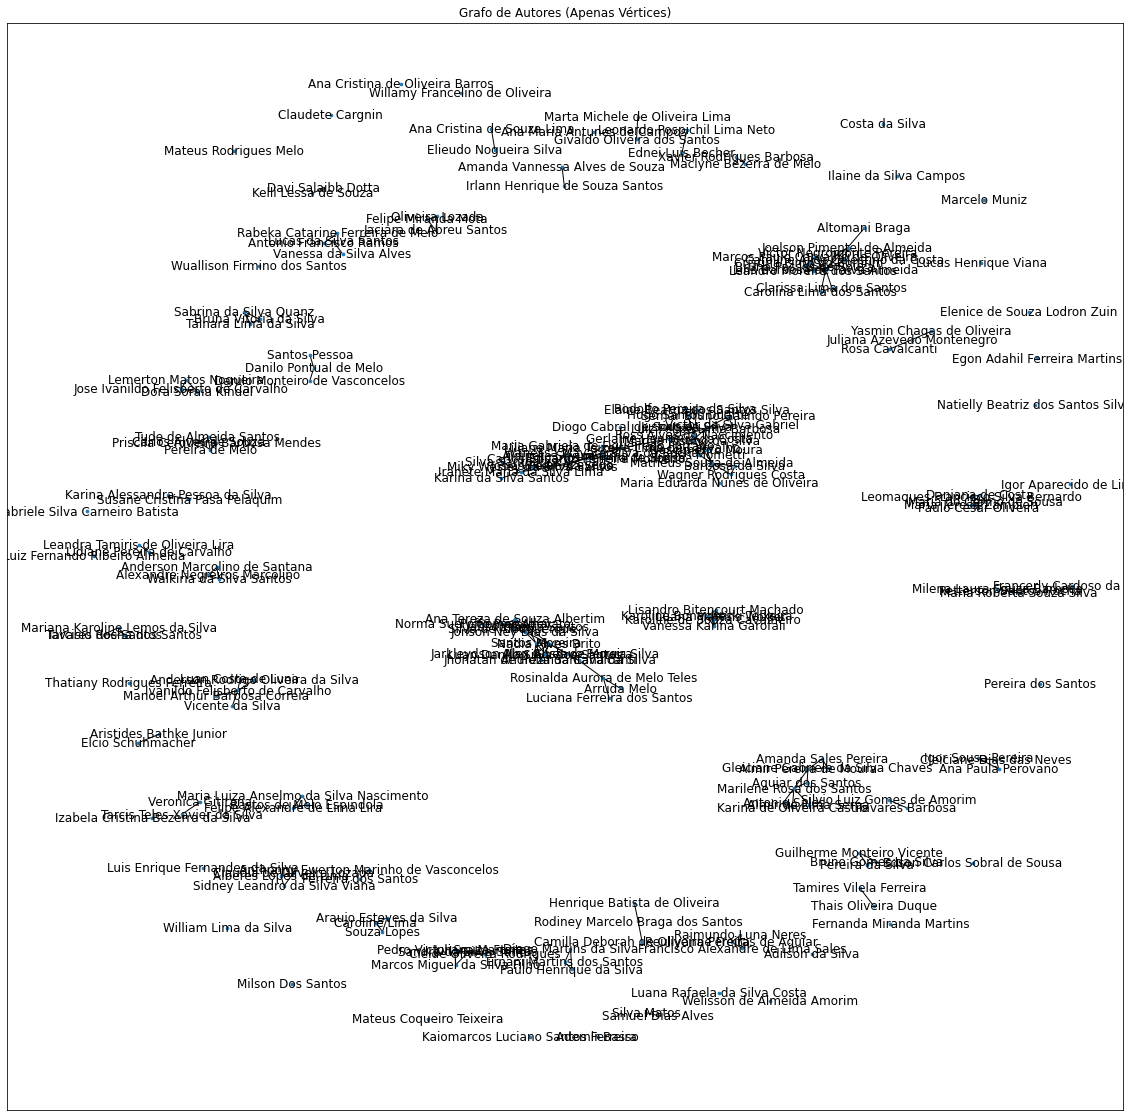

In [213]:
import networkx as nx
import matplotlib.pyplot as plt

m = max(authors_df_filtered['Article'])
print(m)

# Função para extrair as iniciais do nome
def get_initials(full_name):
    parts = full_name.split()
    initials = ''.join([part[0].upper() for part in parts])
    return initials


# Criando um grafo
G = nx.Graph()

# Adicionando vértices ao grafo e armazenando as iniciais
labels = {}
for author in authors_df_filtered['Author']:
    G.add_node(author)
    labels[author] = get_initials(author)
    
# Agrupando autores por artigo
grouped = authors_df_filtered.groupby('Article')

for _, group in grouped:
    authors = group['Author'].tolist()
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G.add_edge(authors[i], authors[j])


# Definindo o tamanho da figura
plt.figure(figsize=(20, 20))  # Você pode ajustar esses valores conforme necessário

# Desenhando o grafo
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=7)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Configurações adicionais para o gráfico
plt.title("Grafo de Autores (Apenas Vértices)")
plt.show()

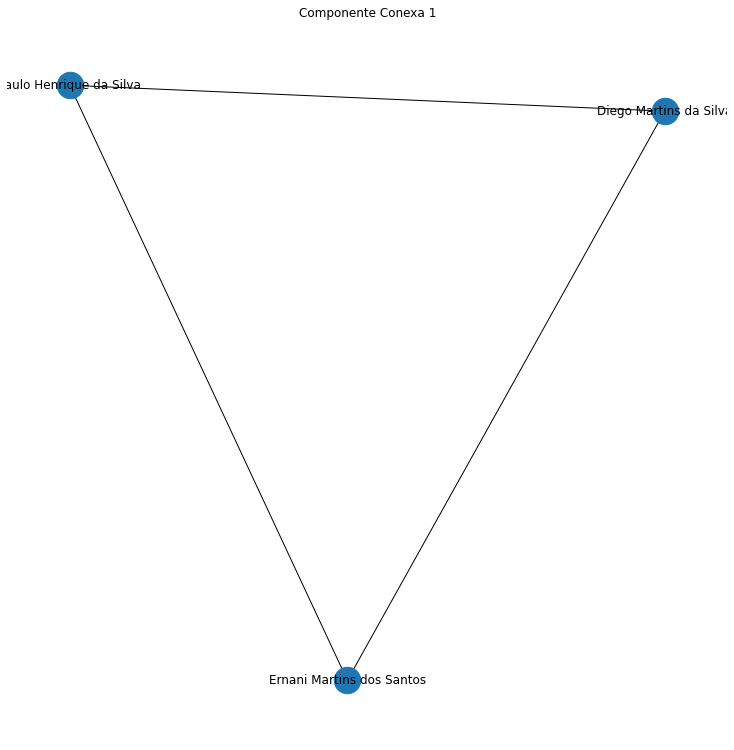

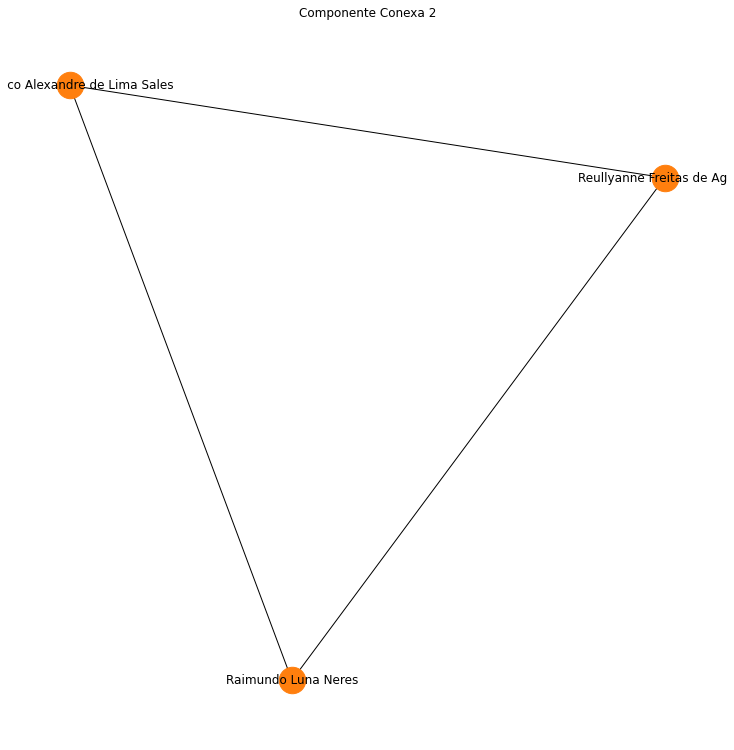

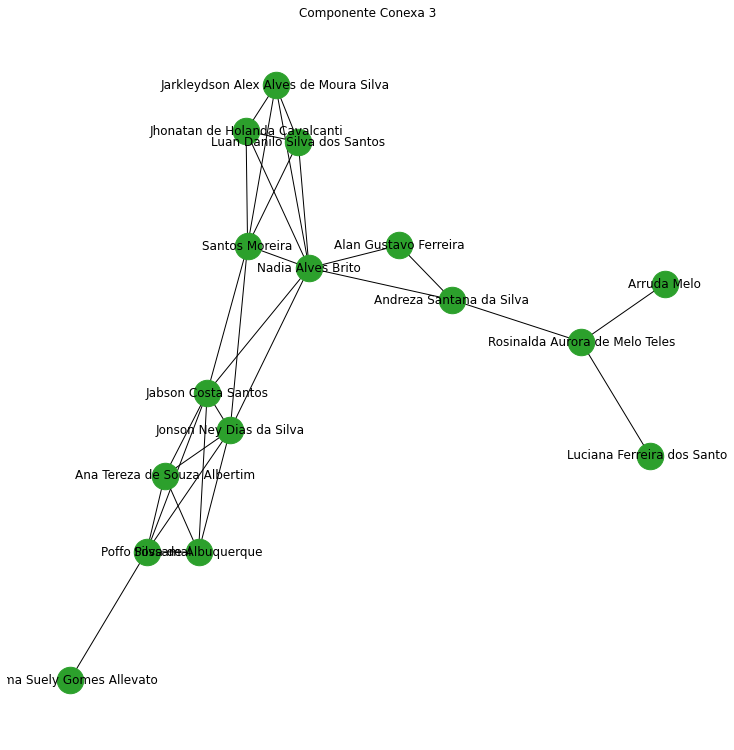

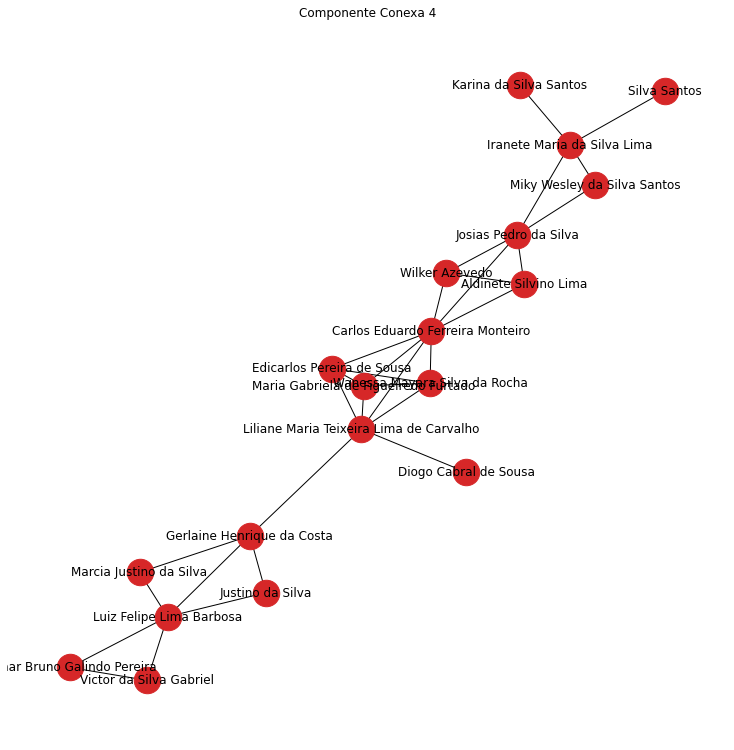

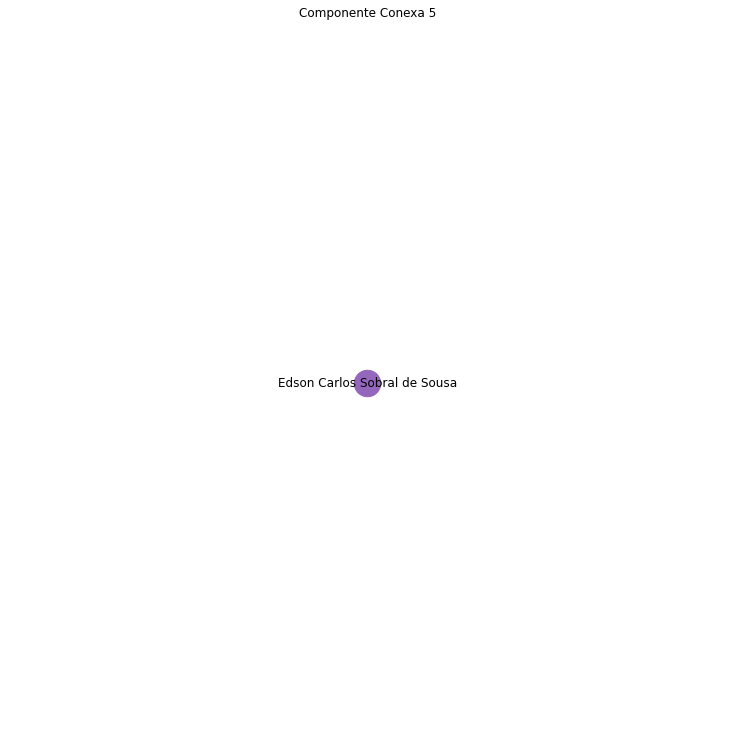

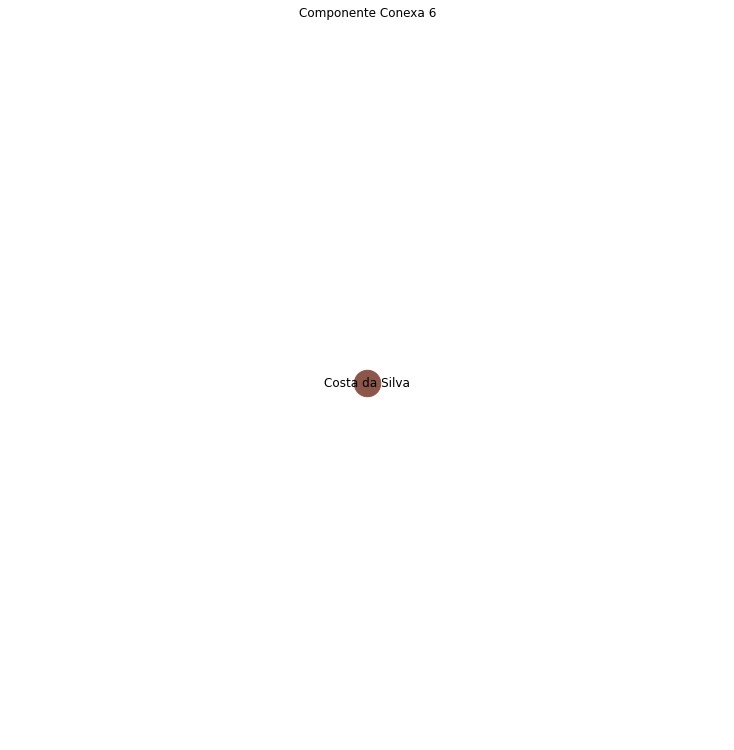

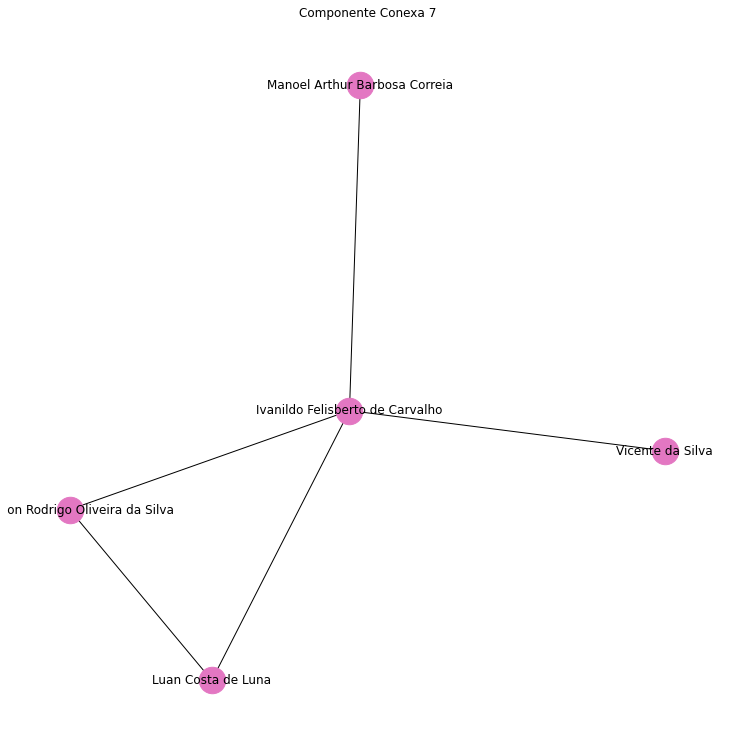

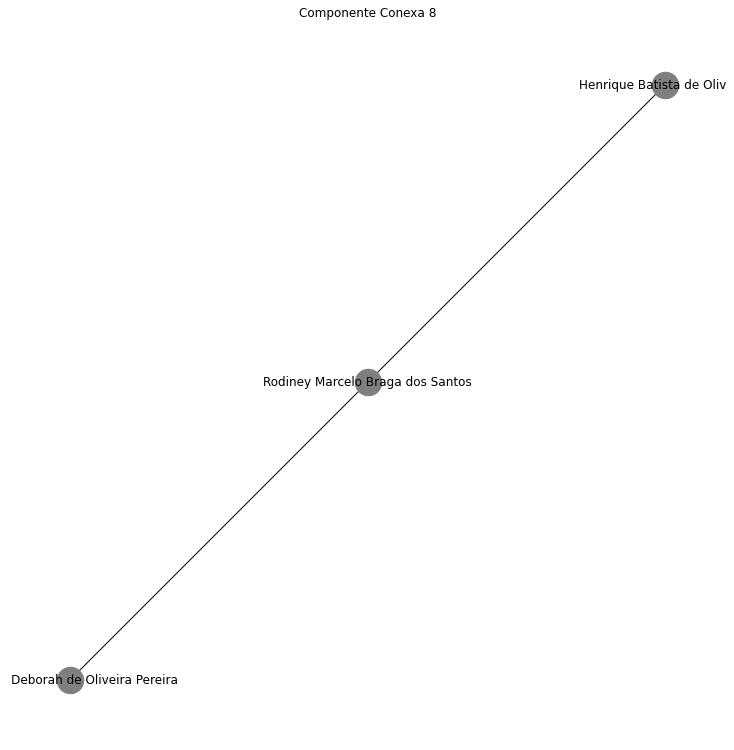

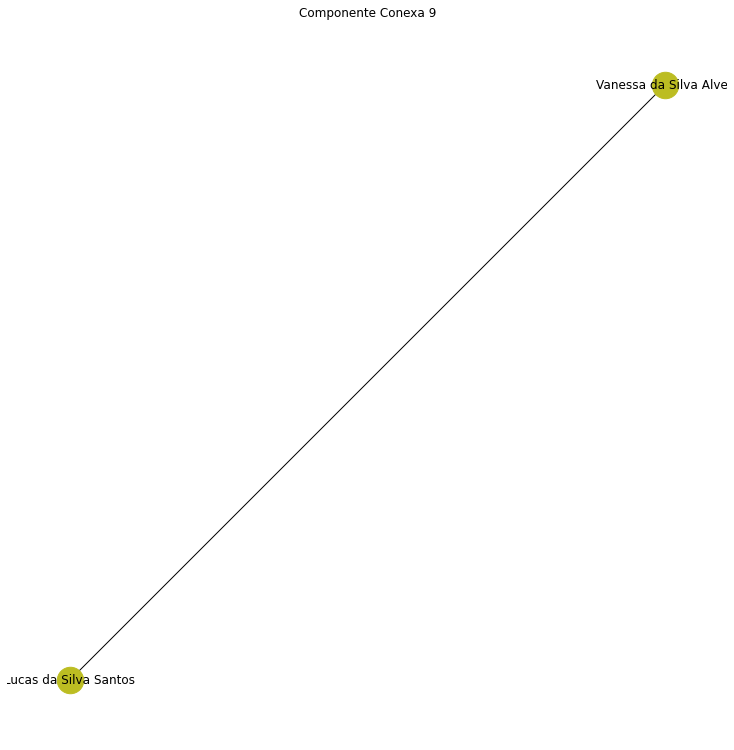

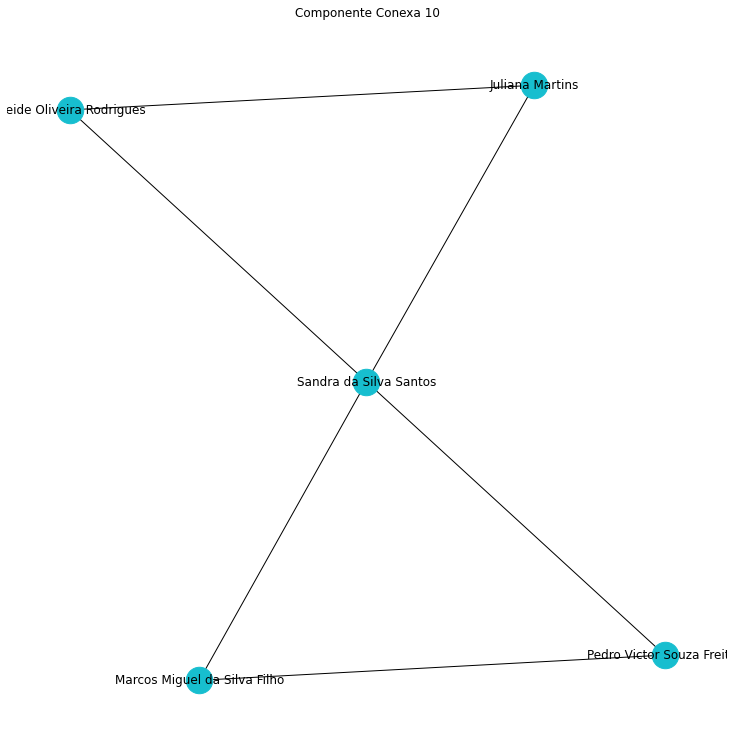

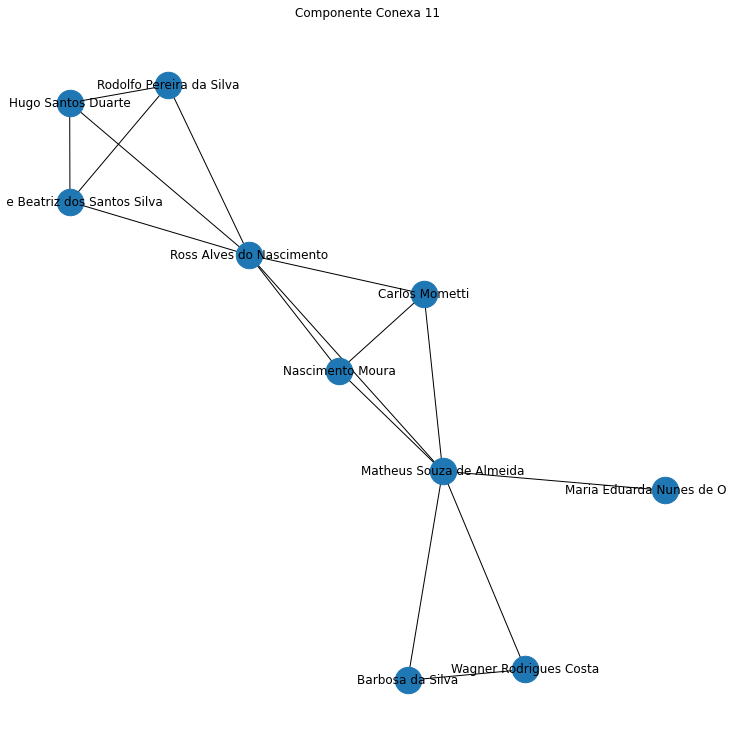

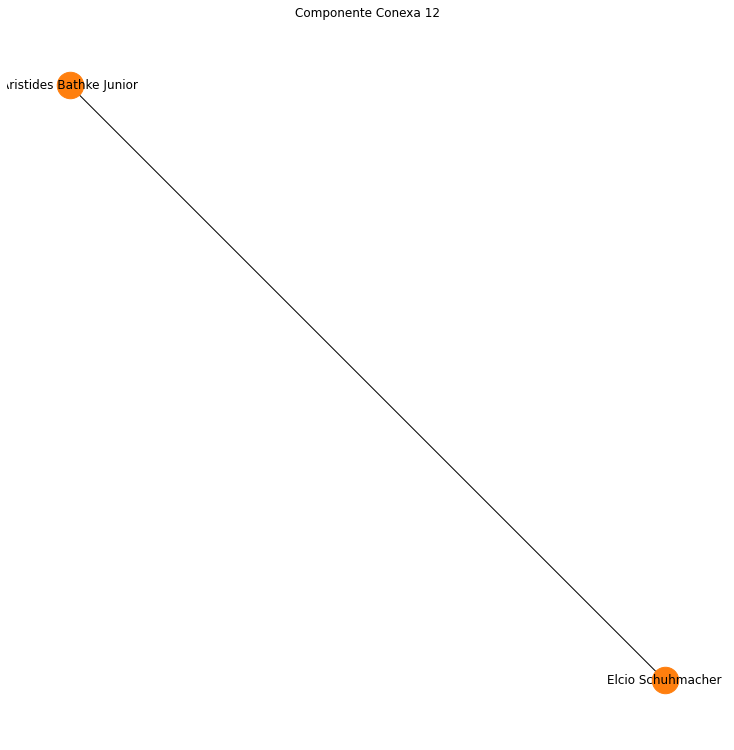

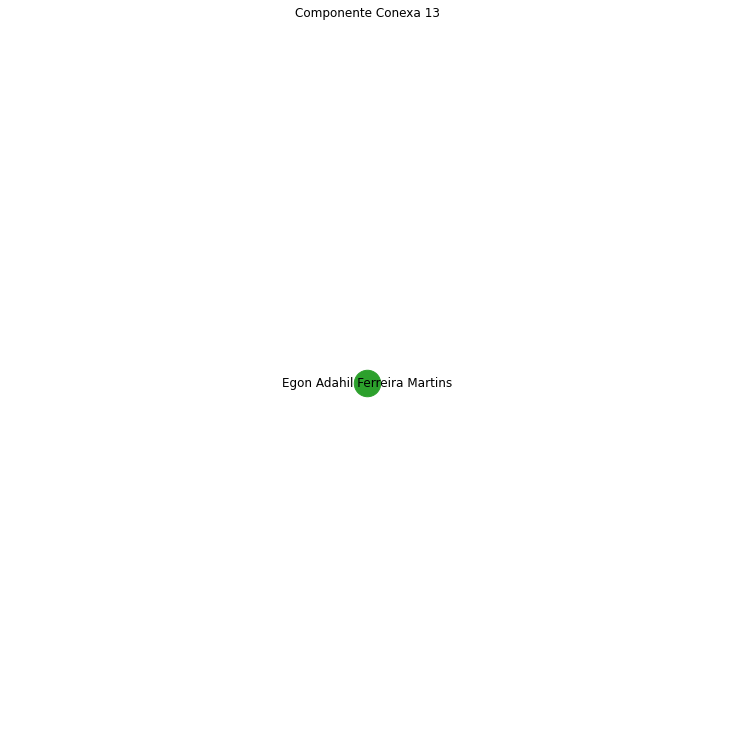

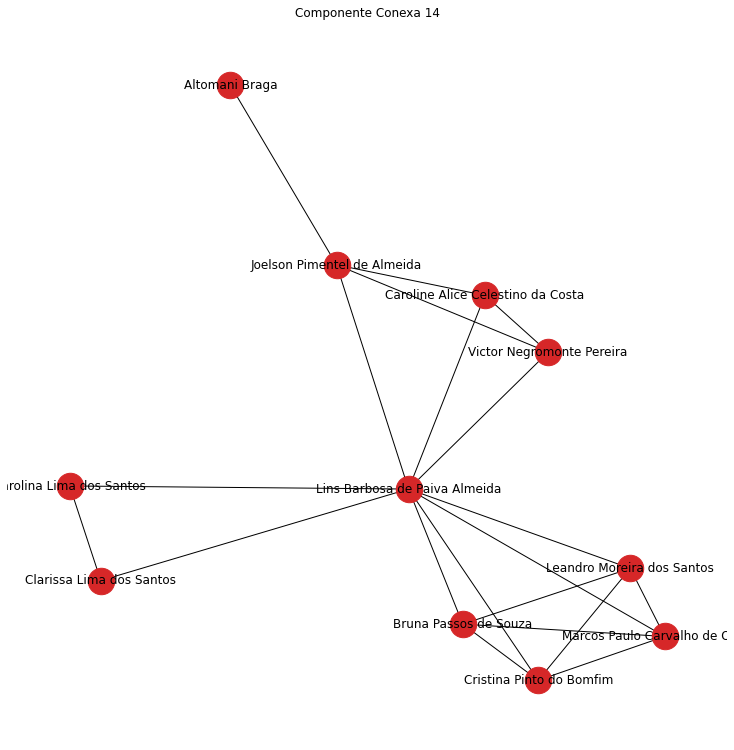

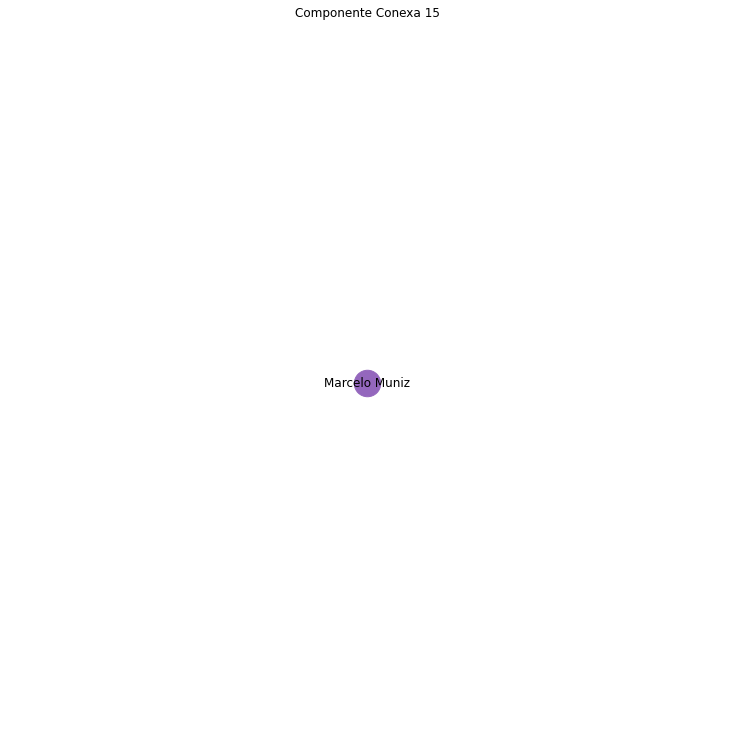

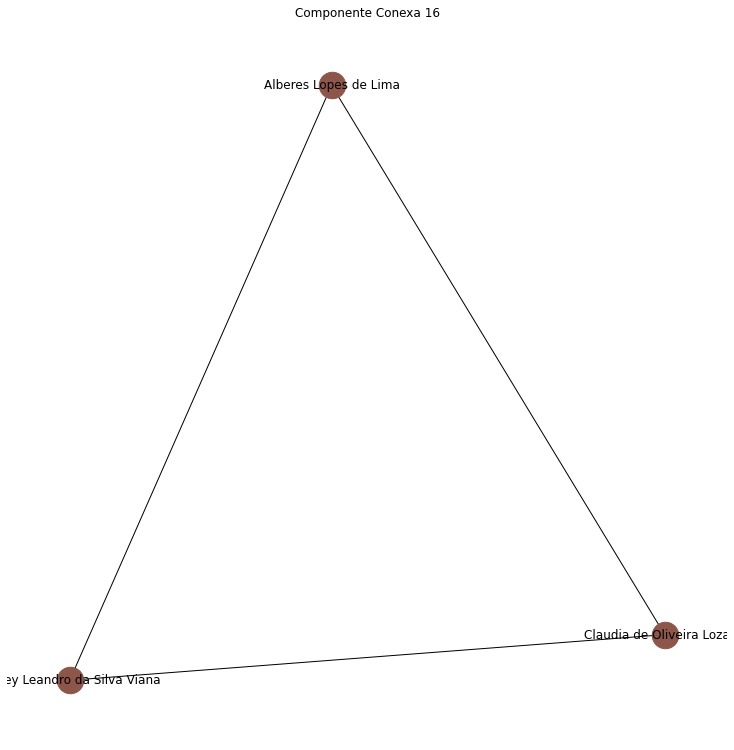

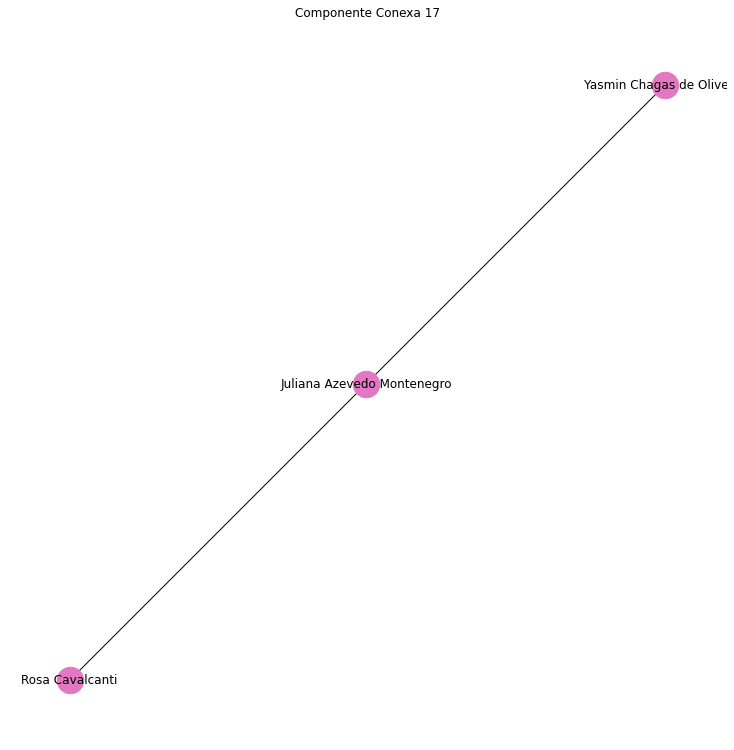

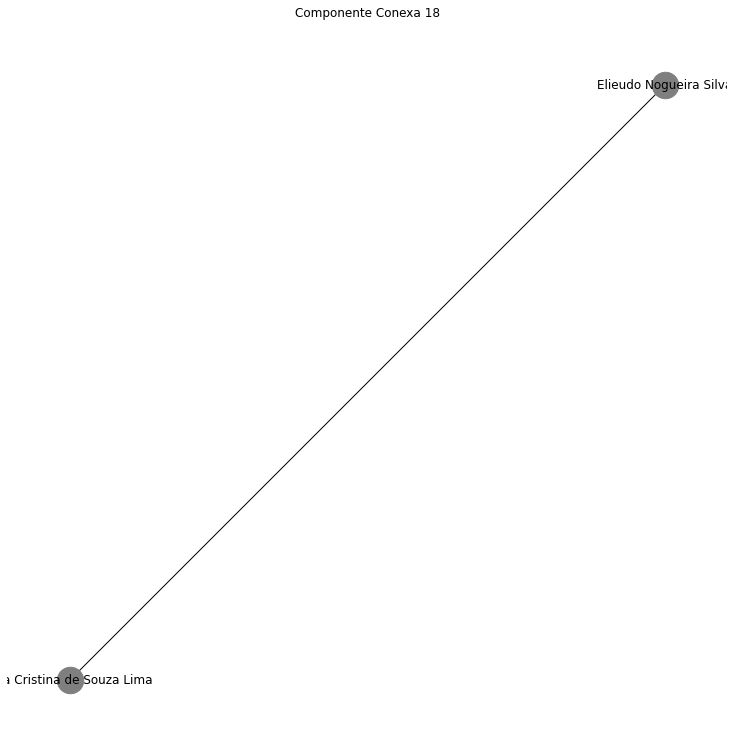

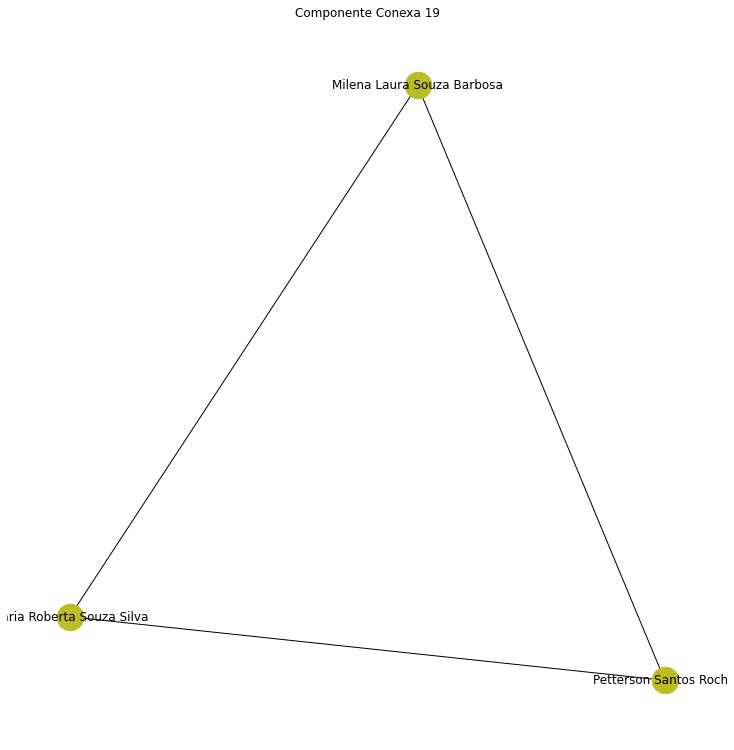

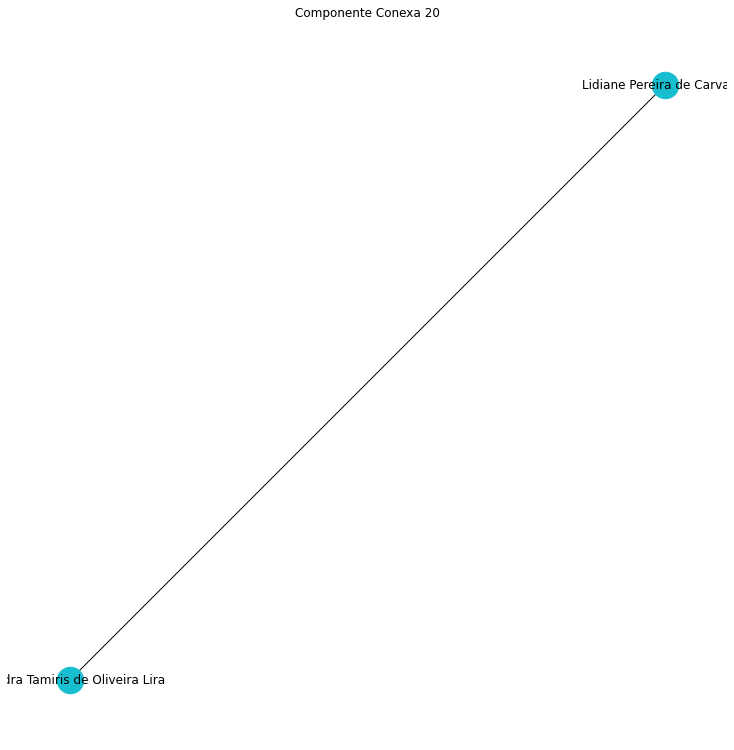

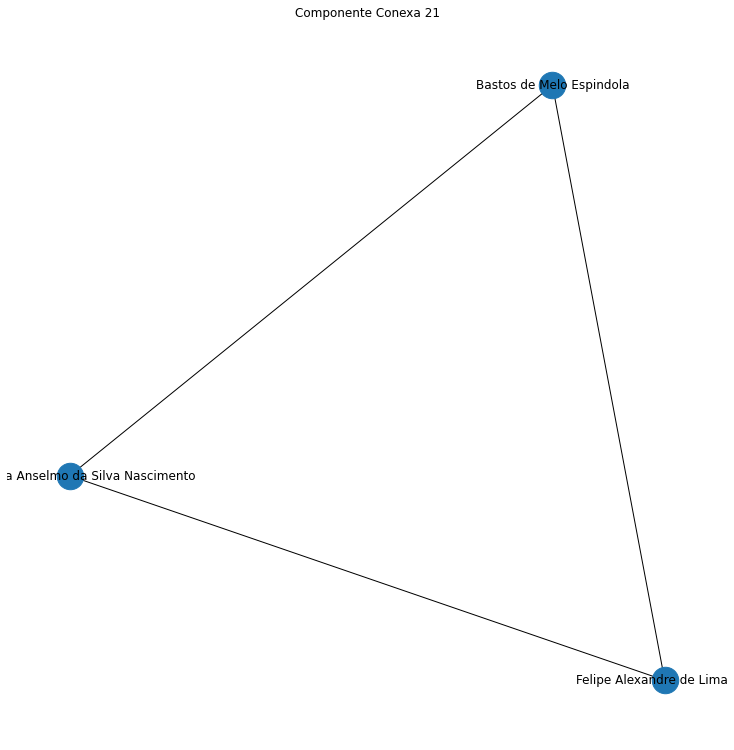

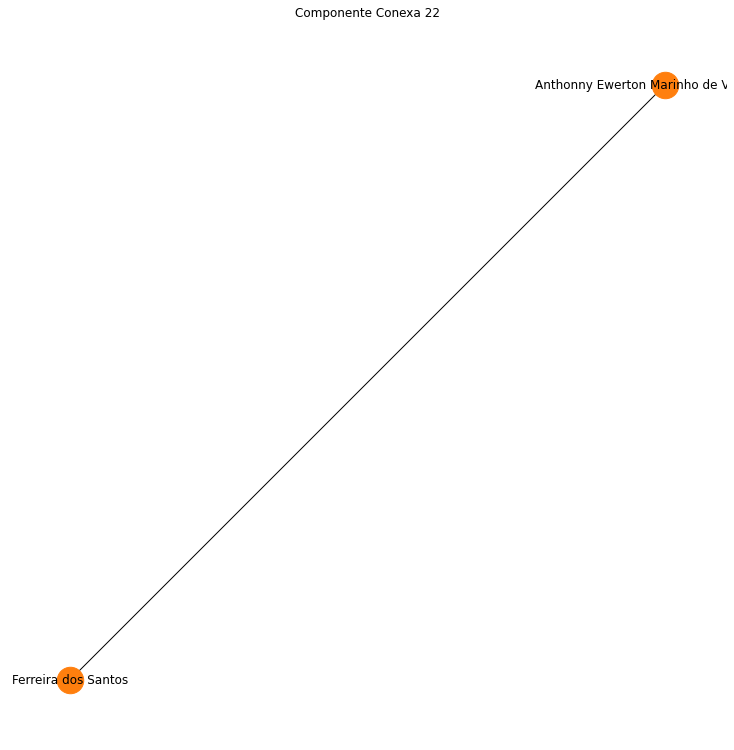

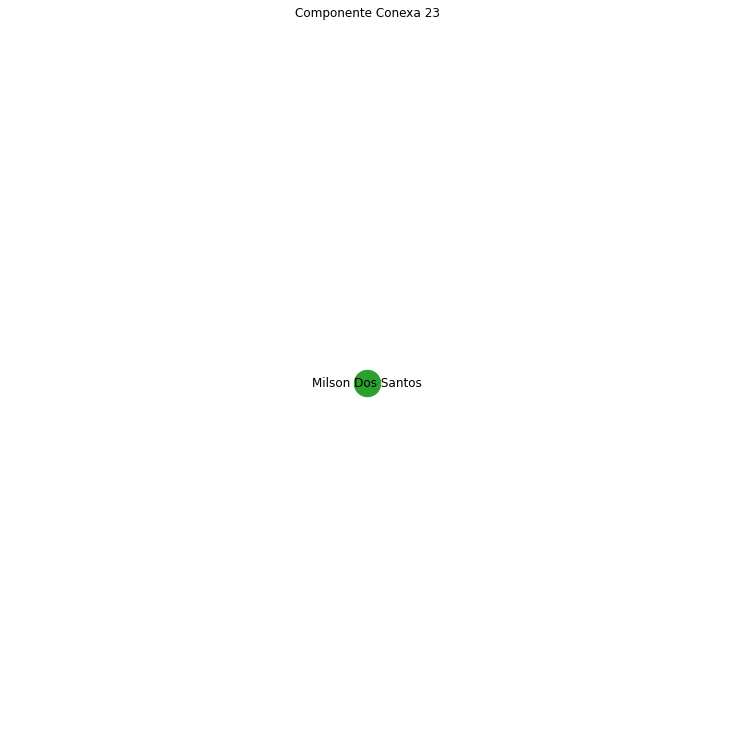

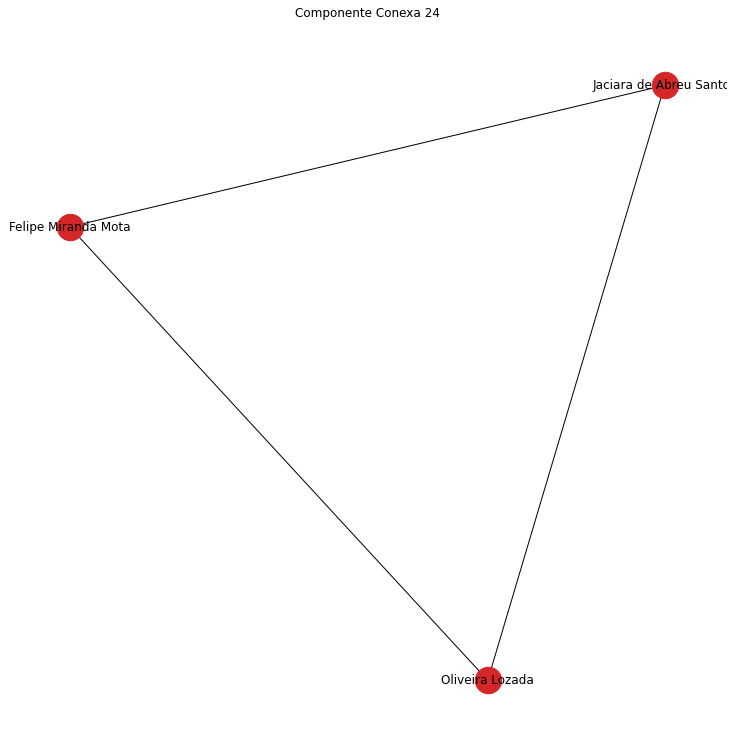

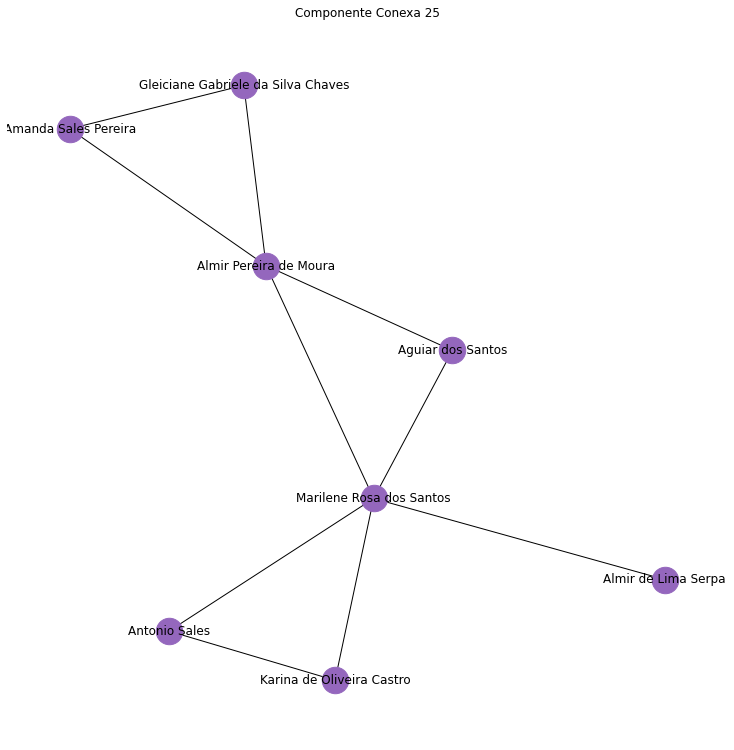

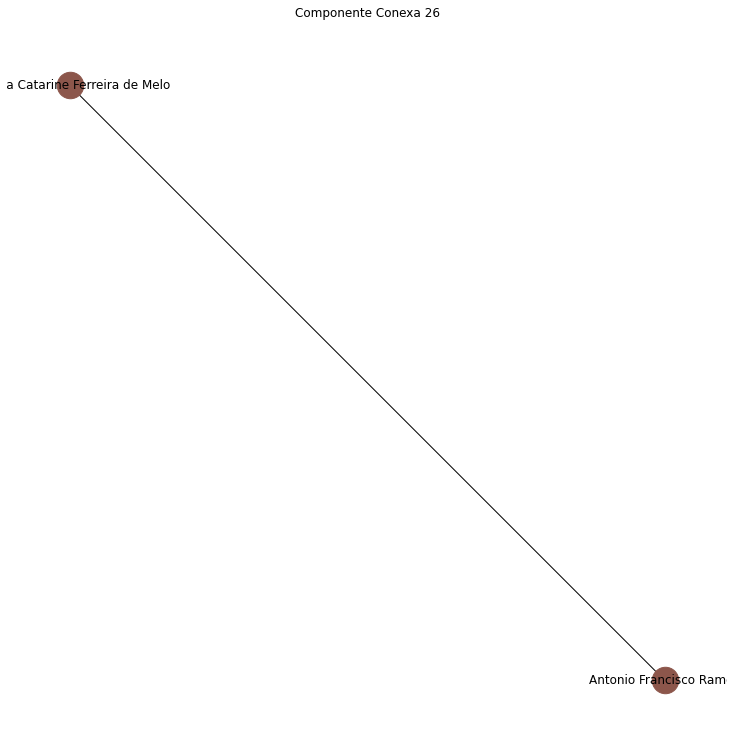

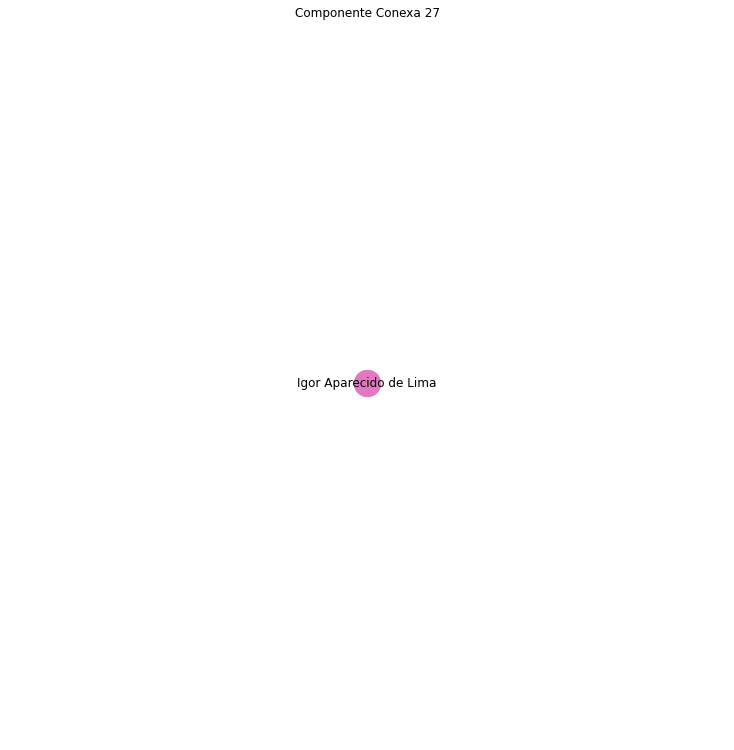

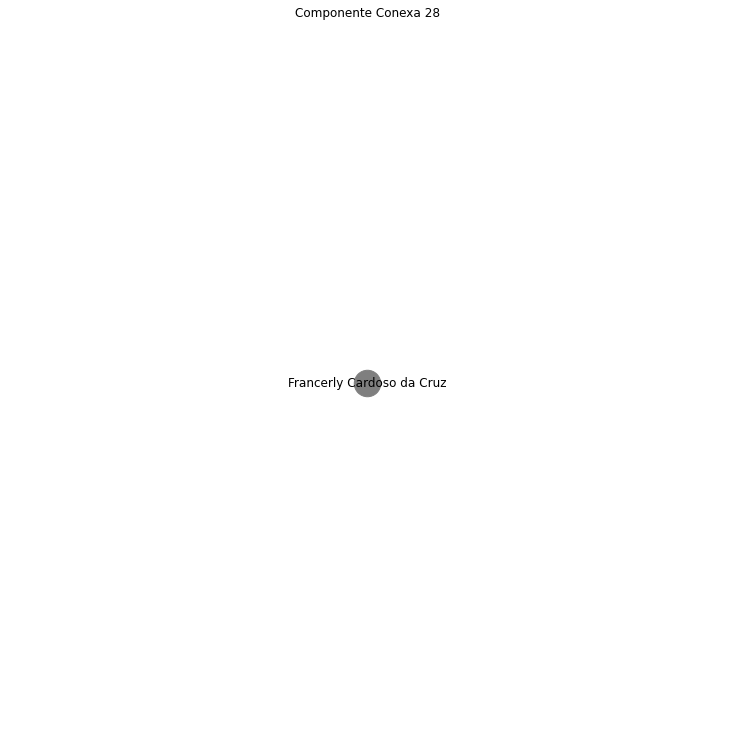

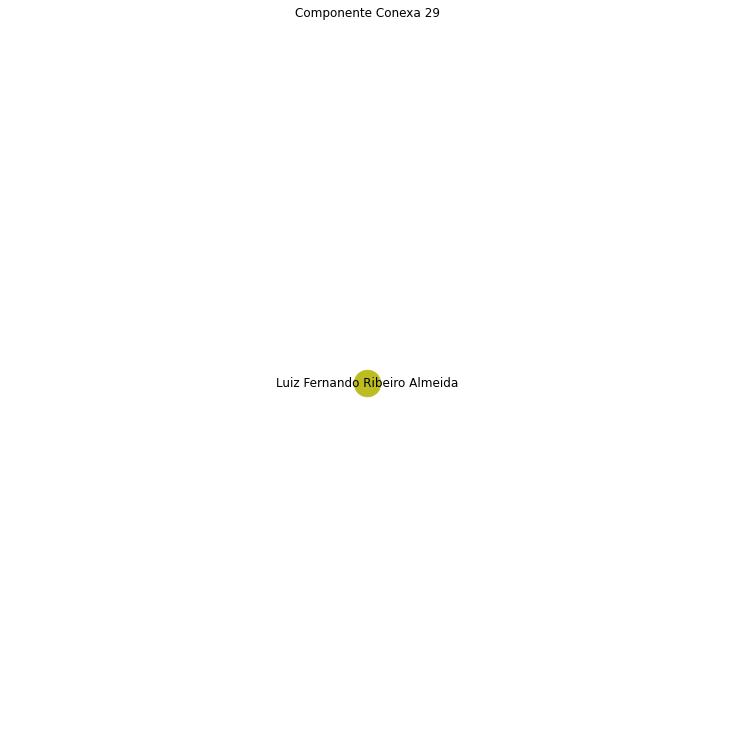

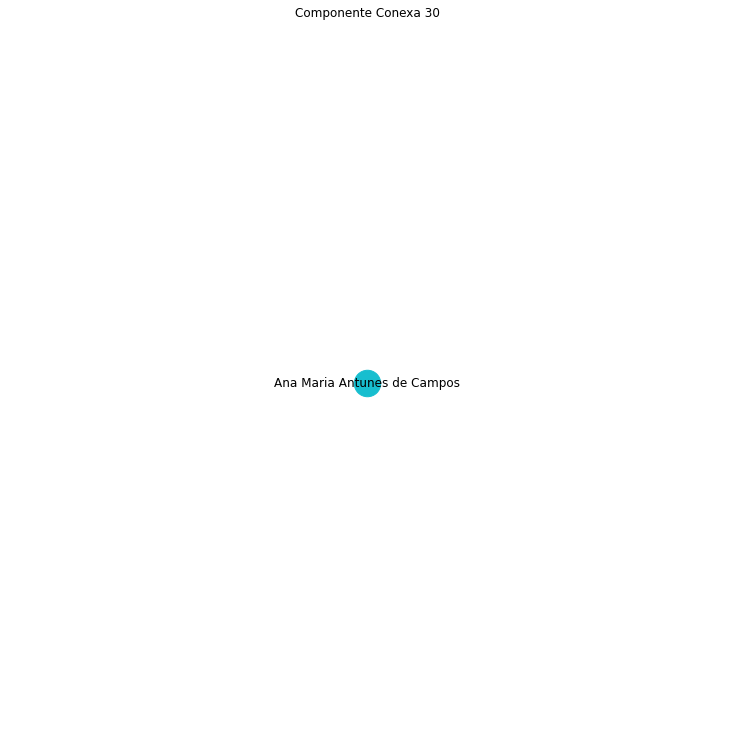

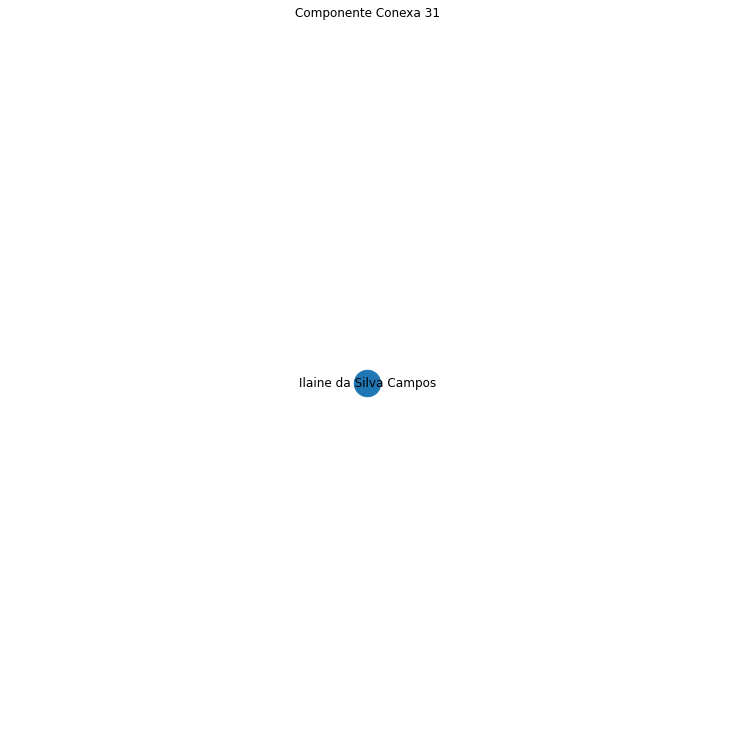

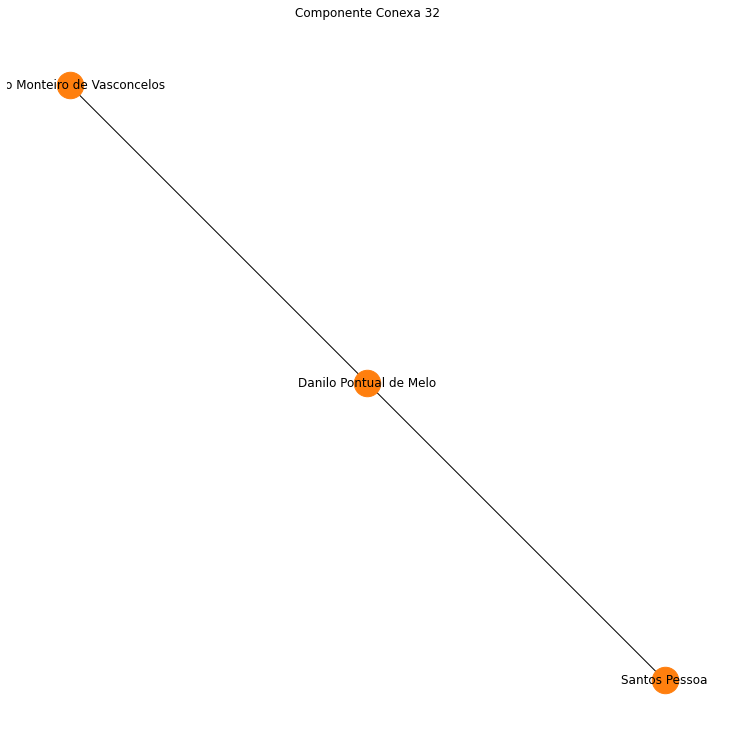

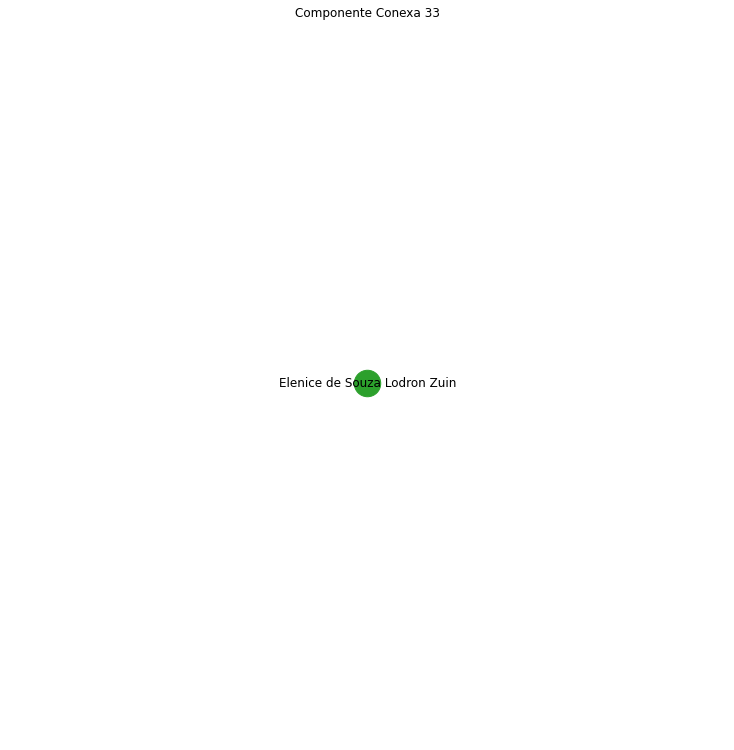

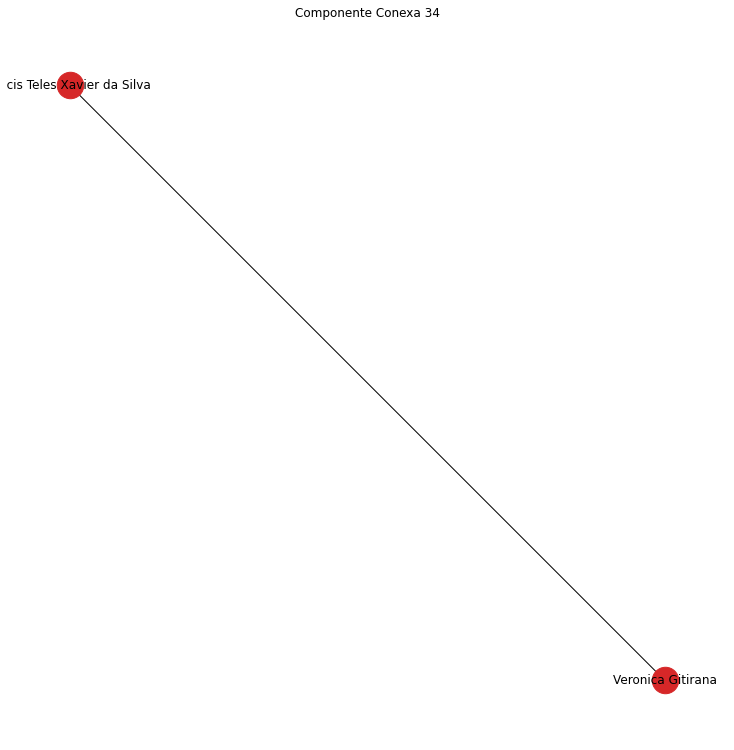

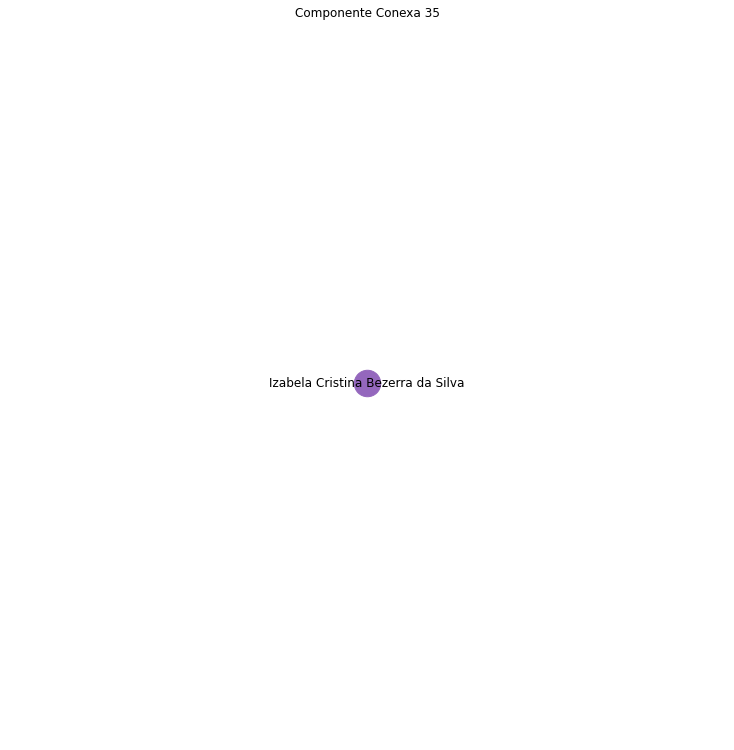

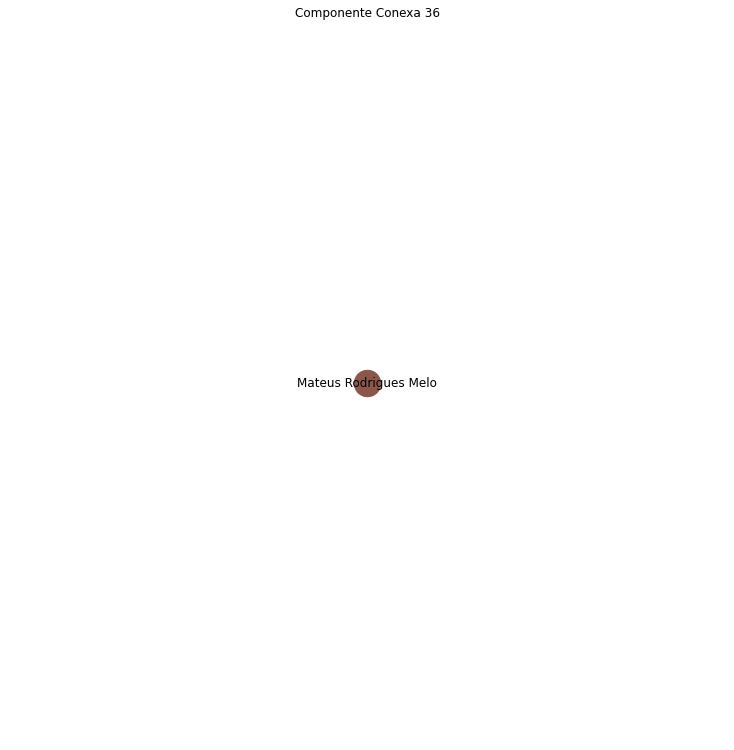

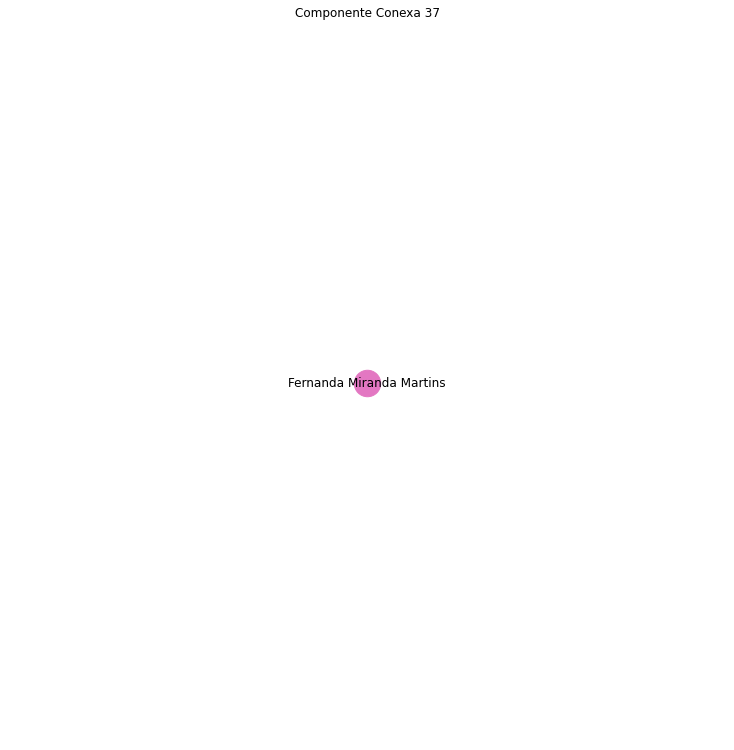

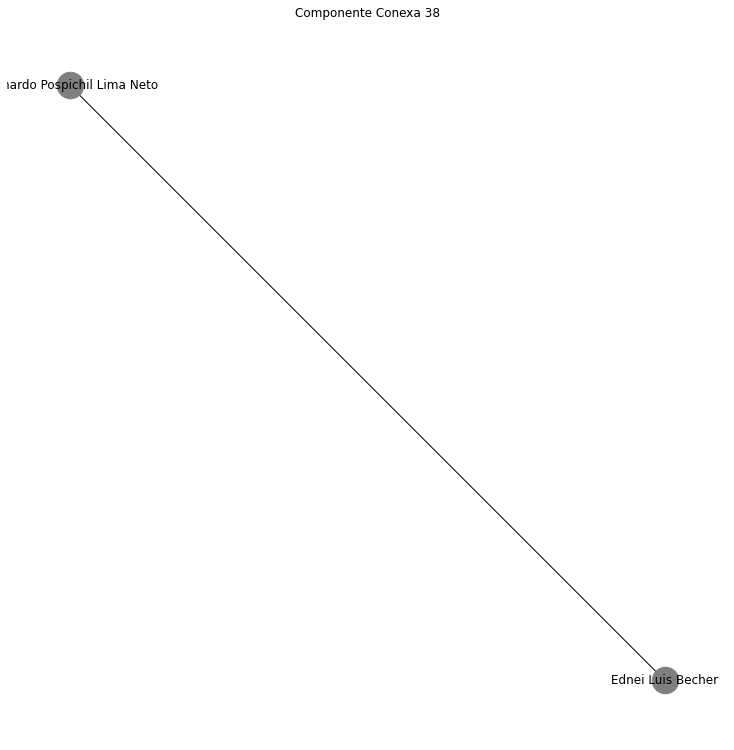

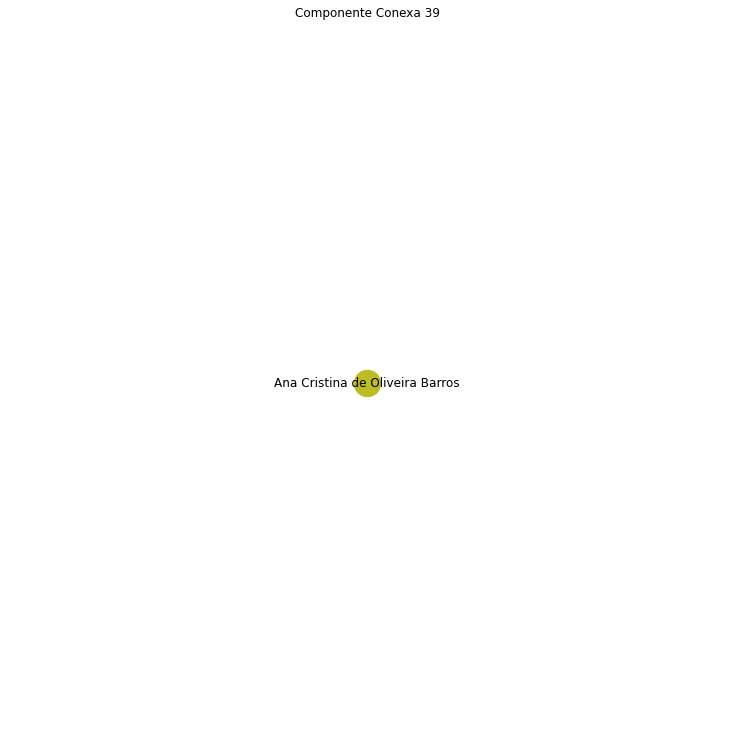

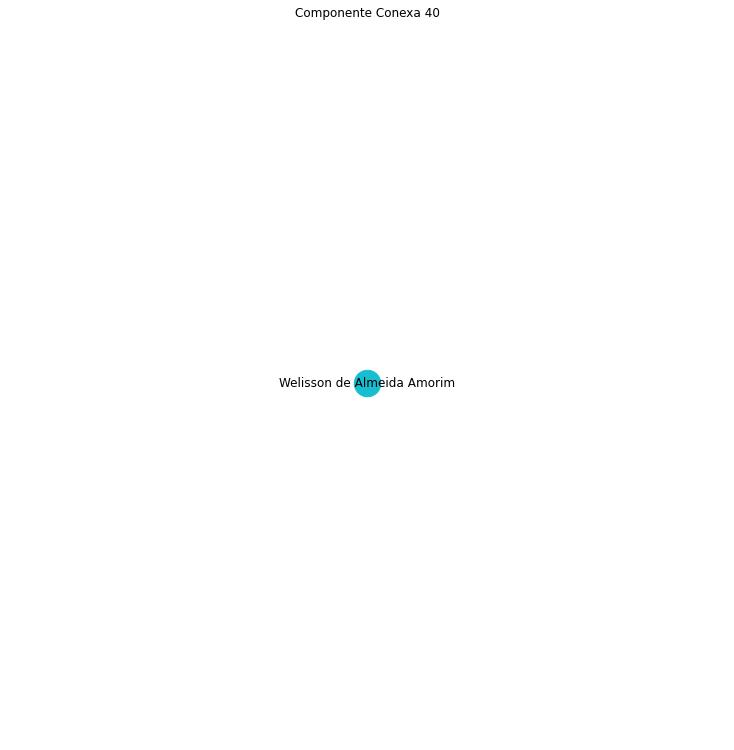

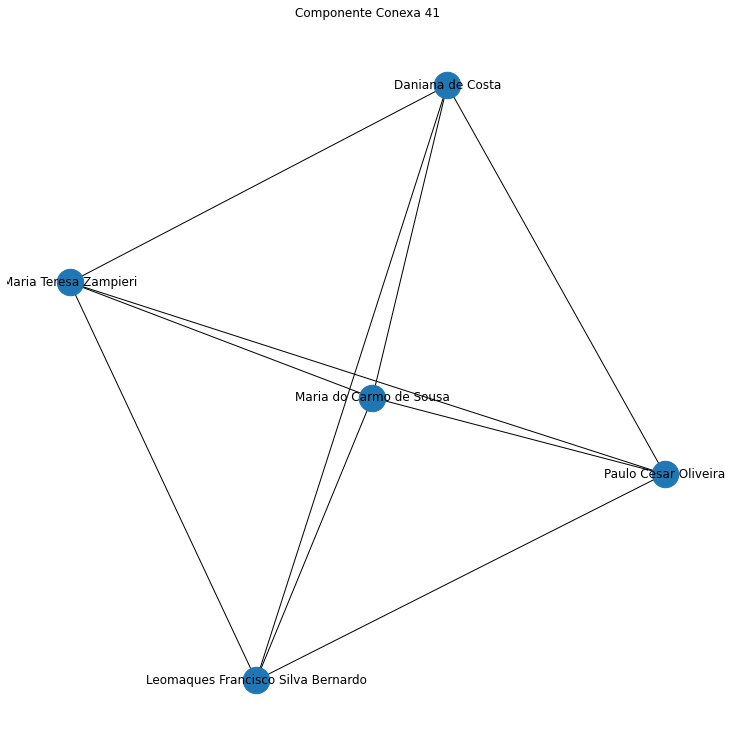

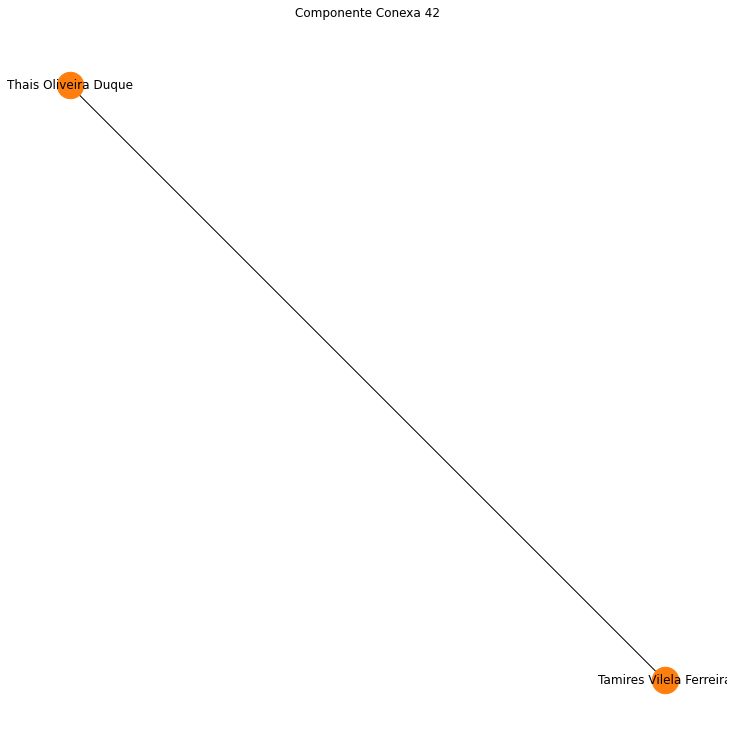

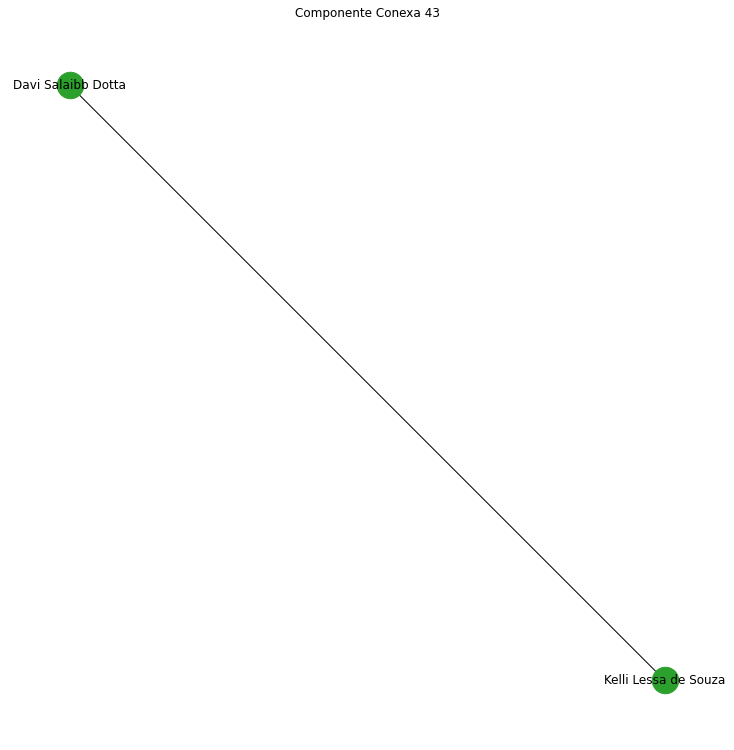

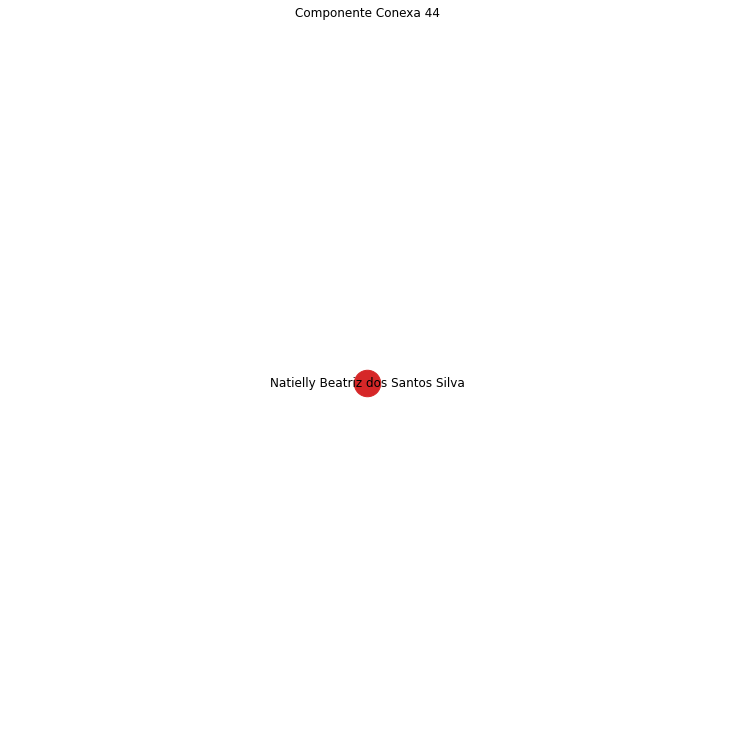

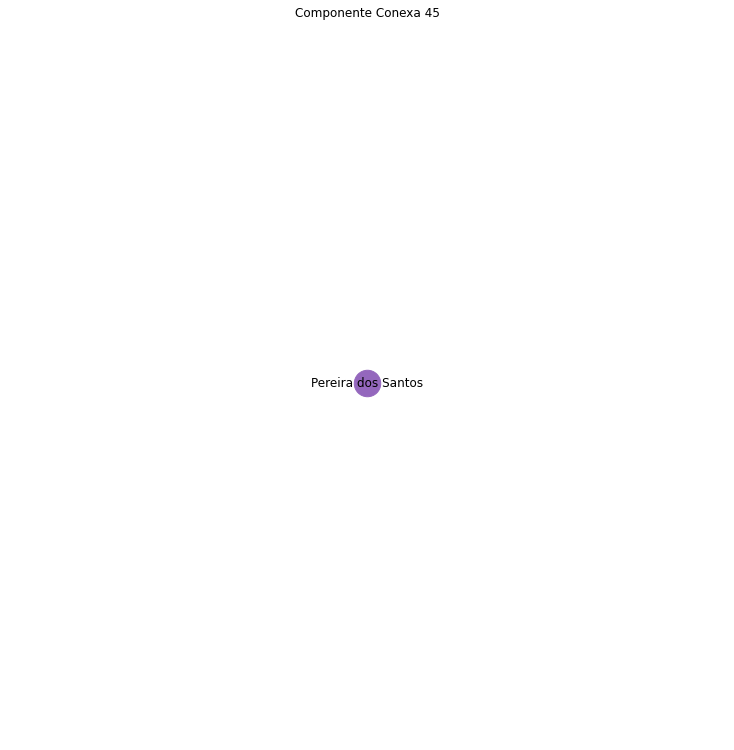

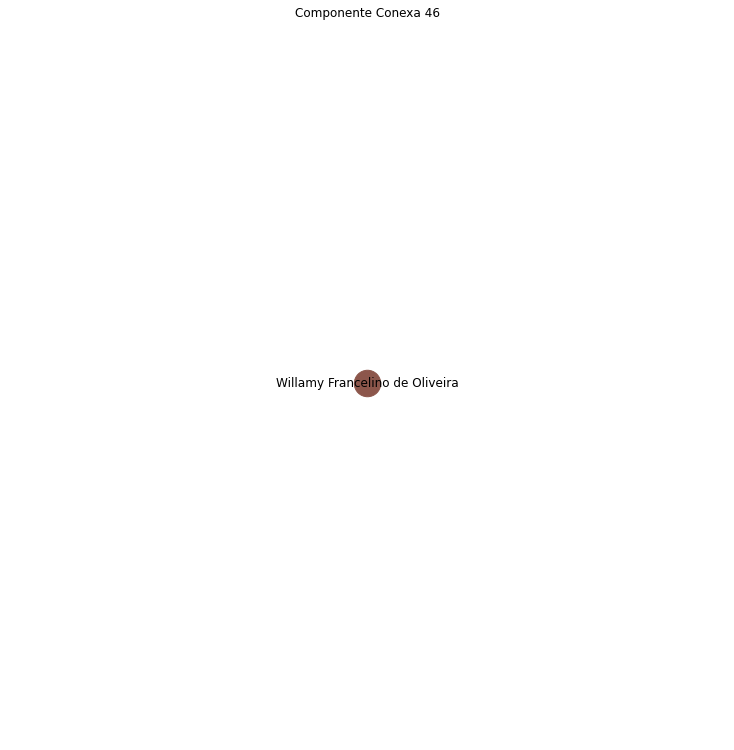

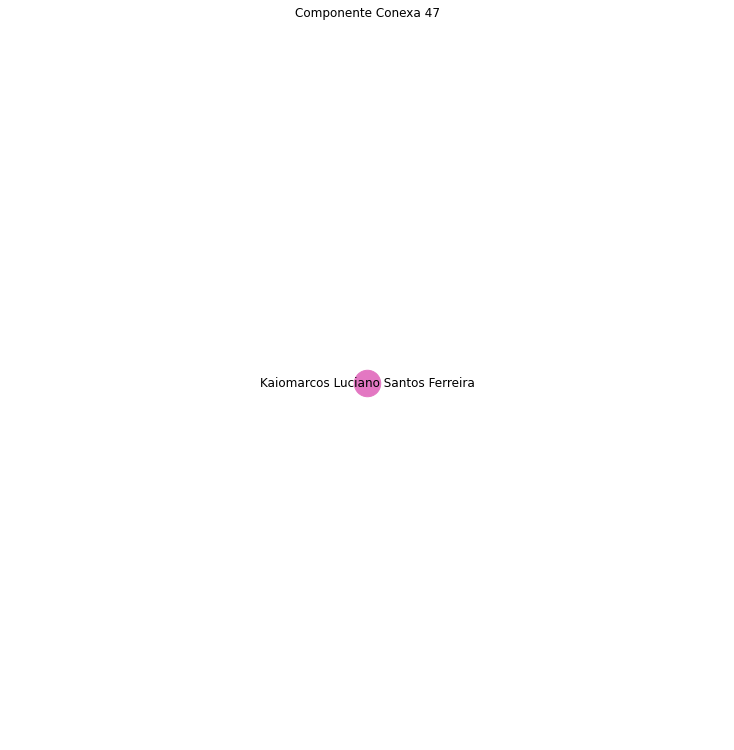

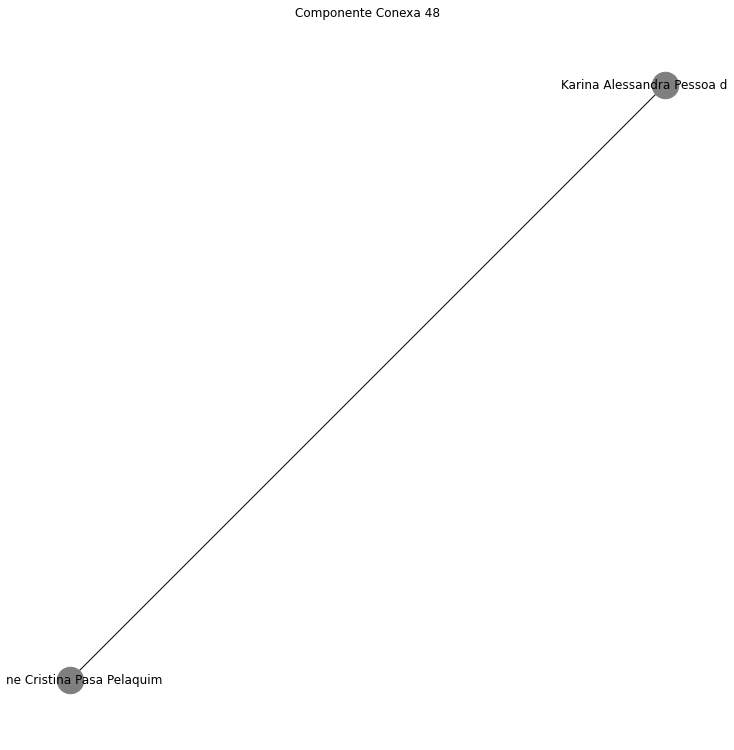

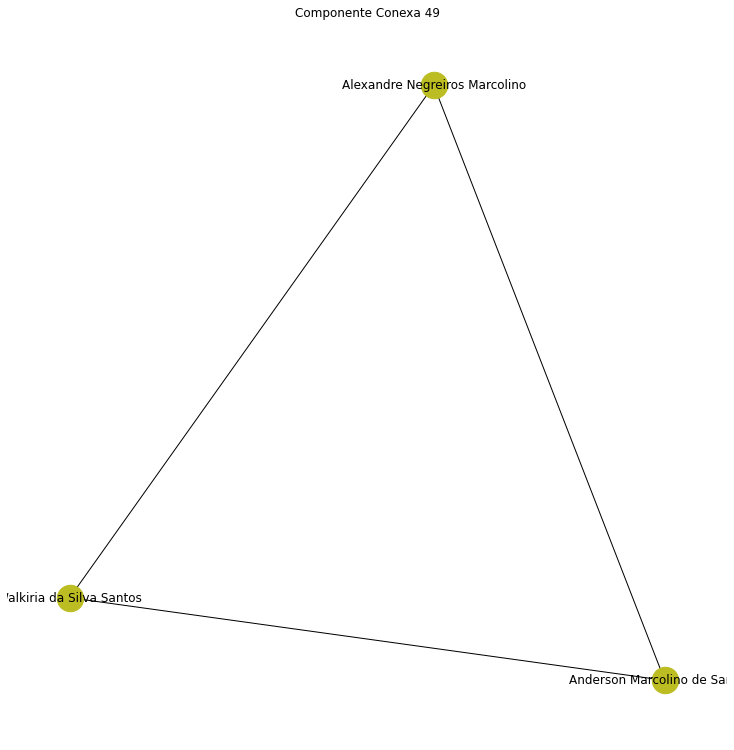

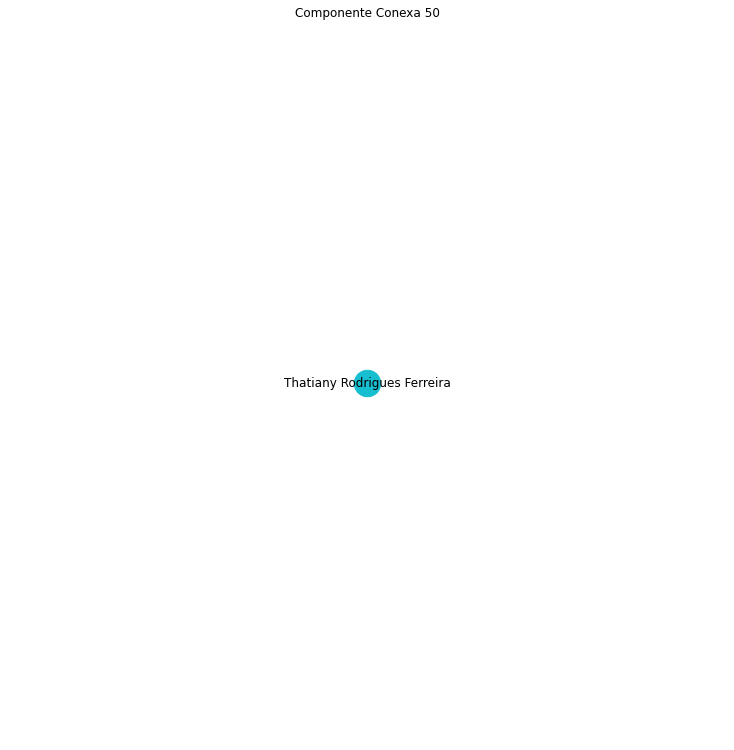

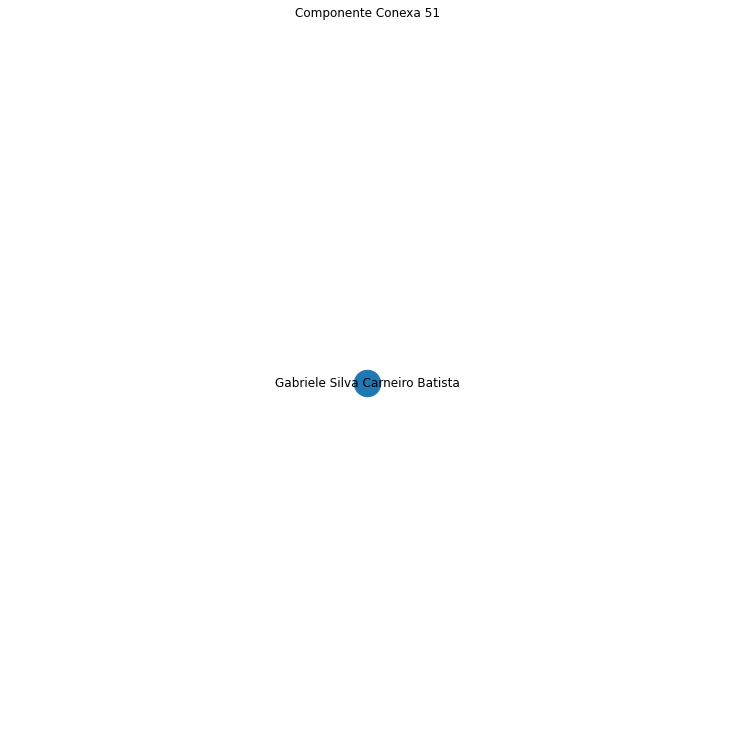

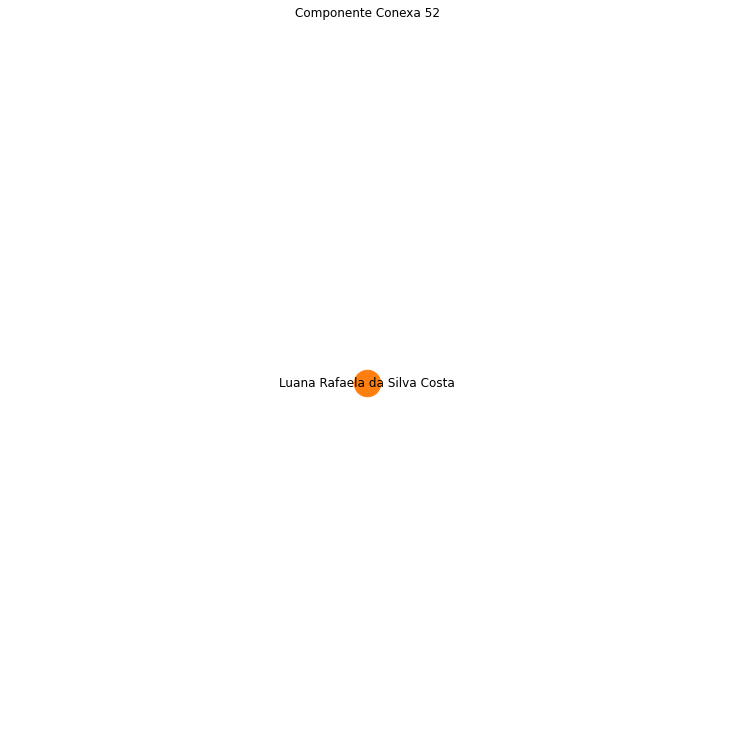

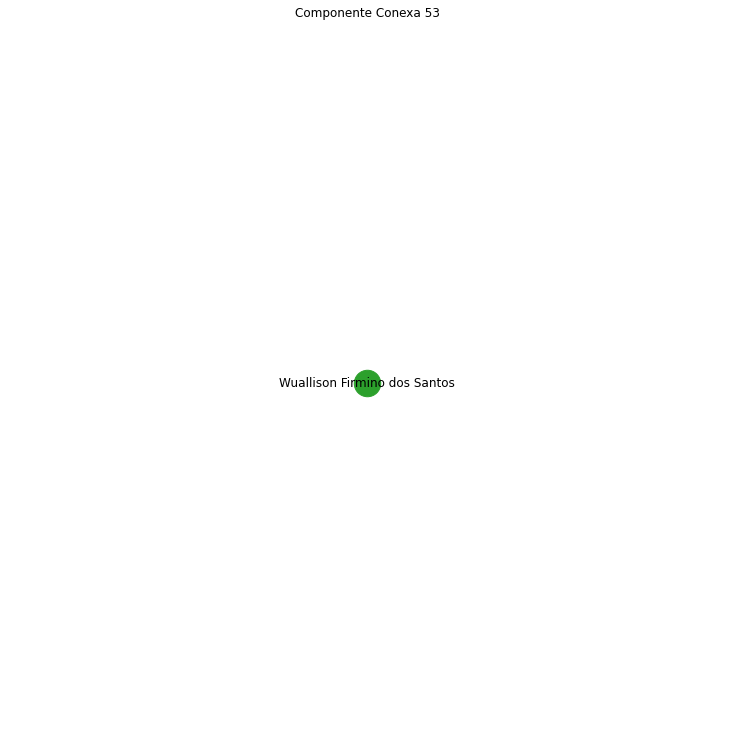

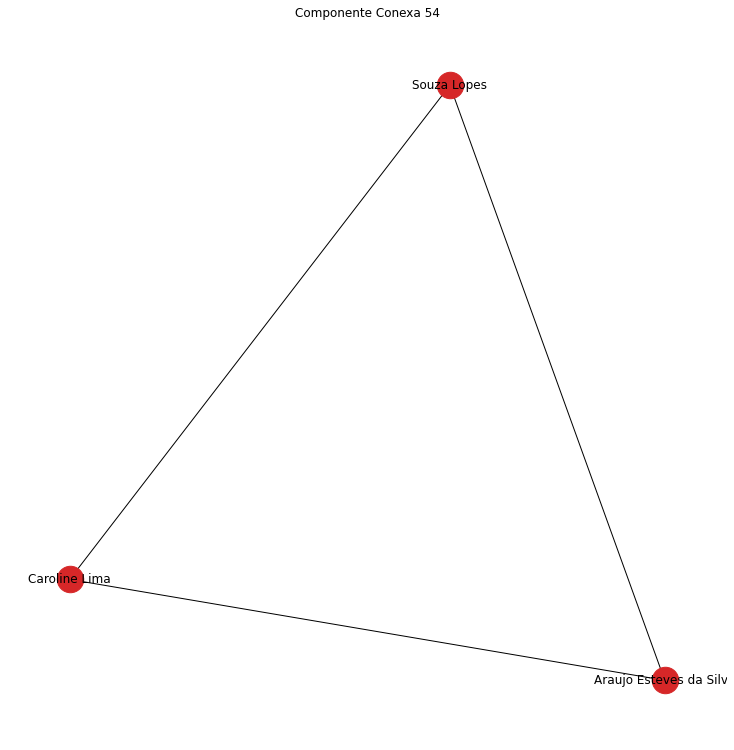

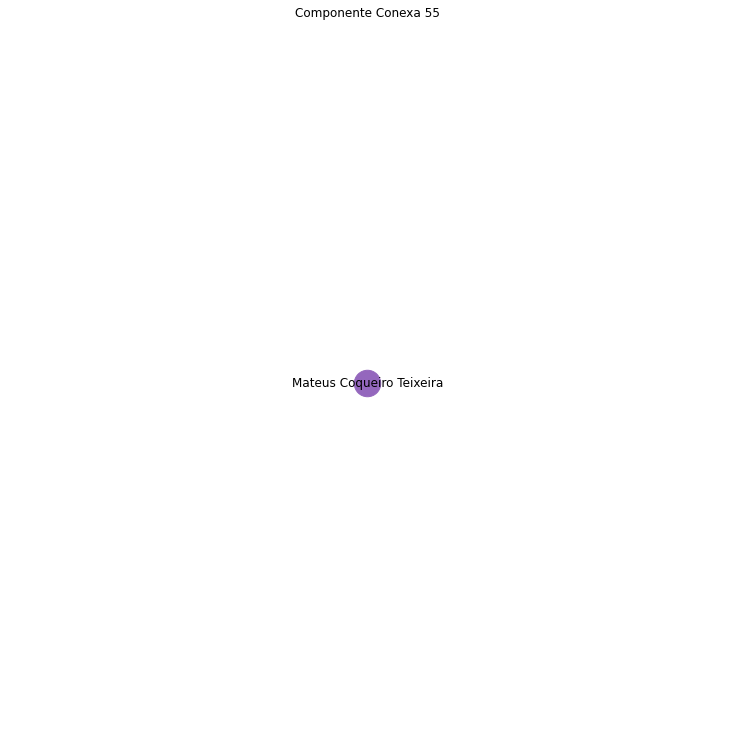

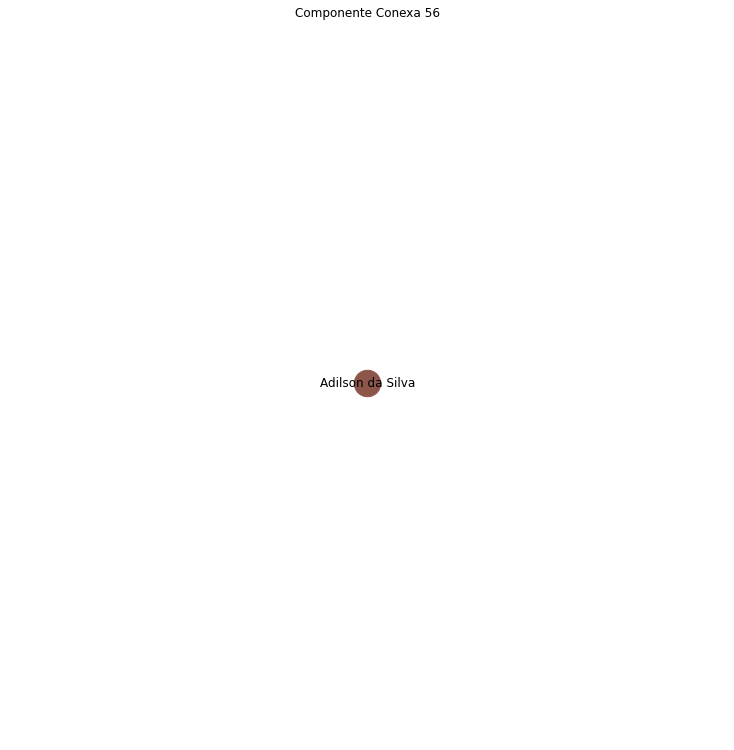

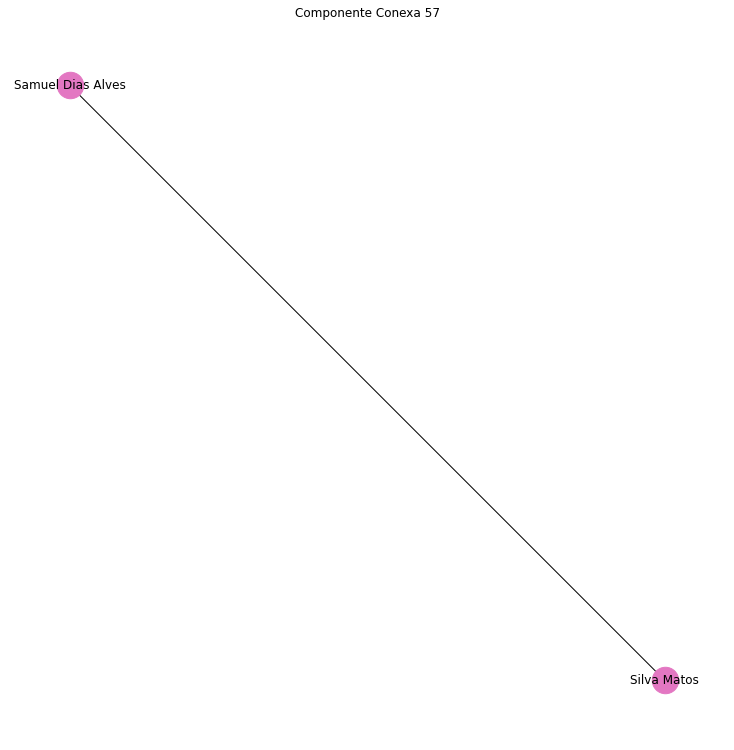

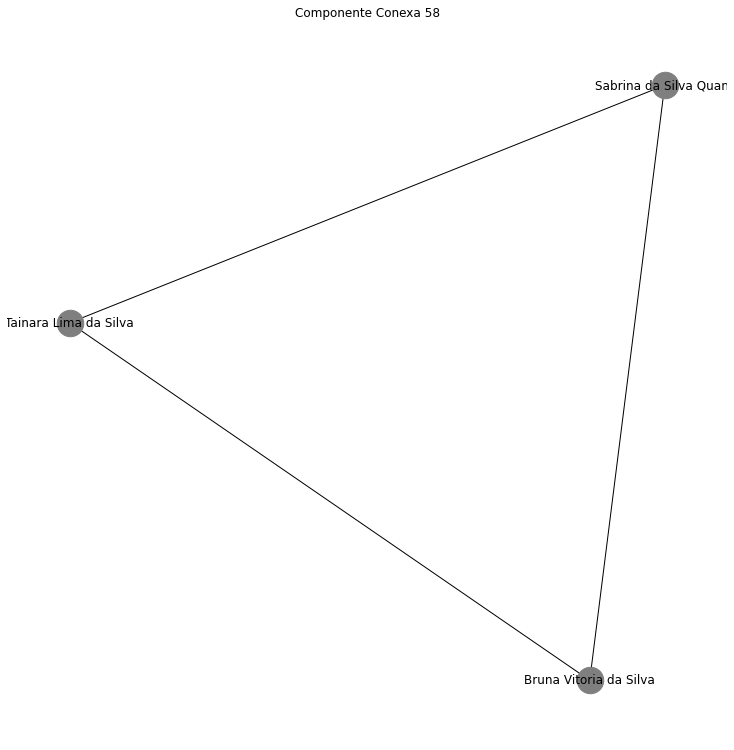

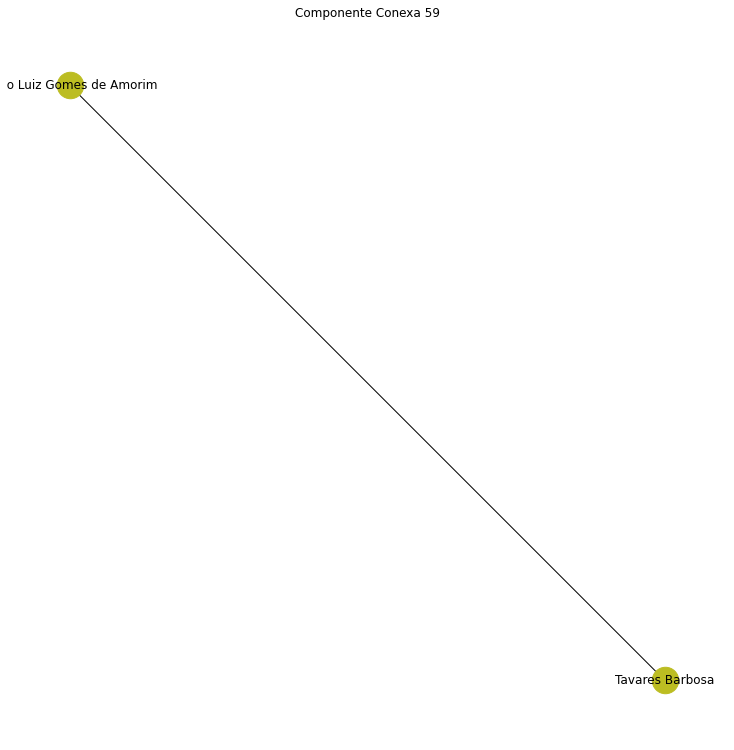

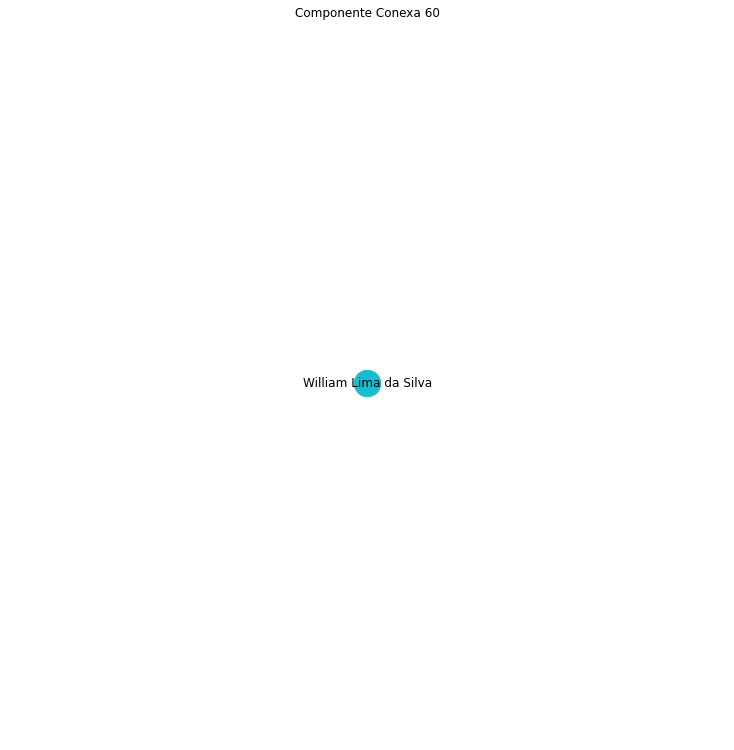

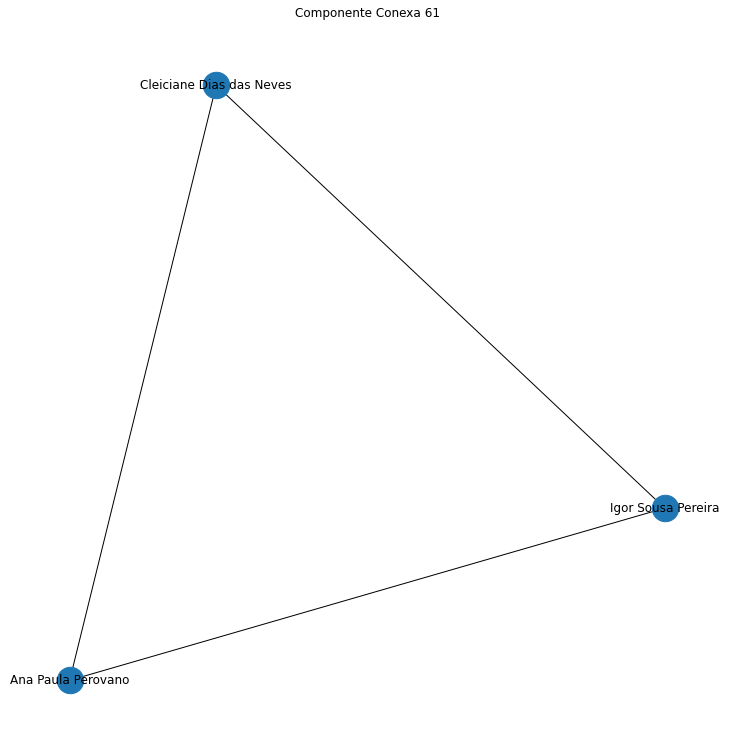

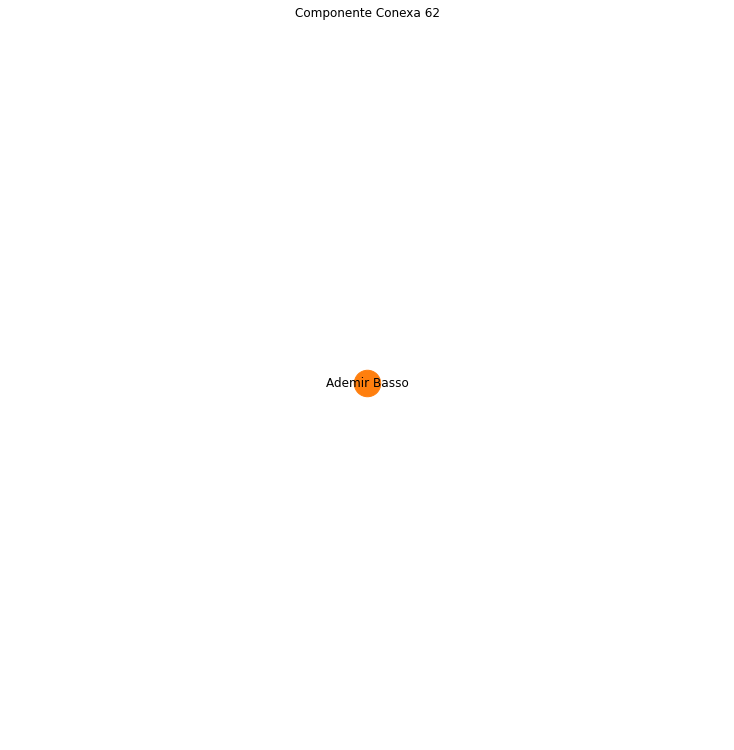

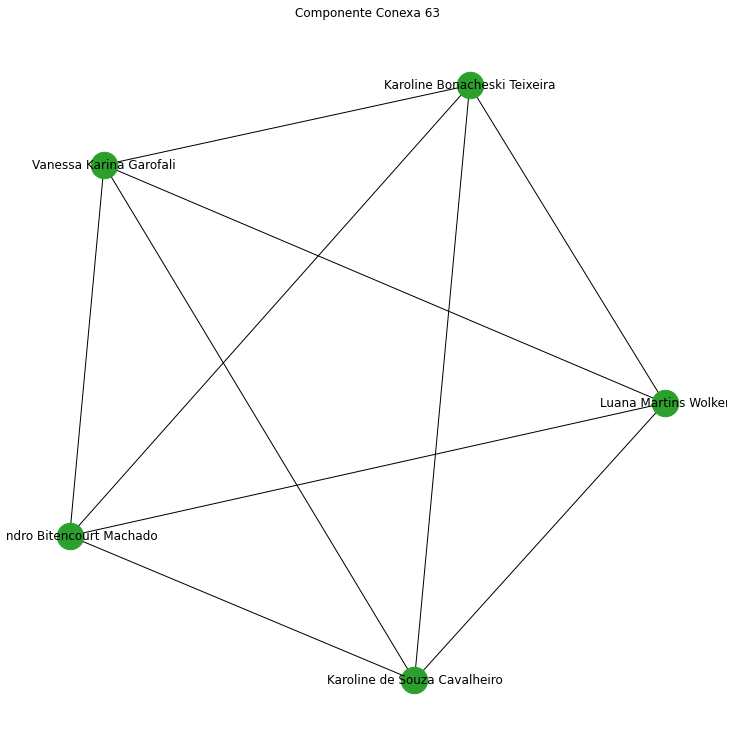

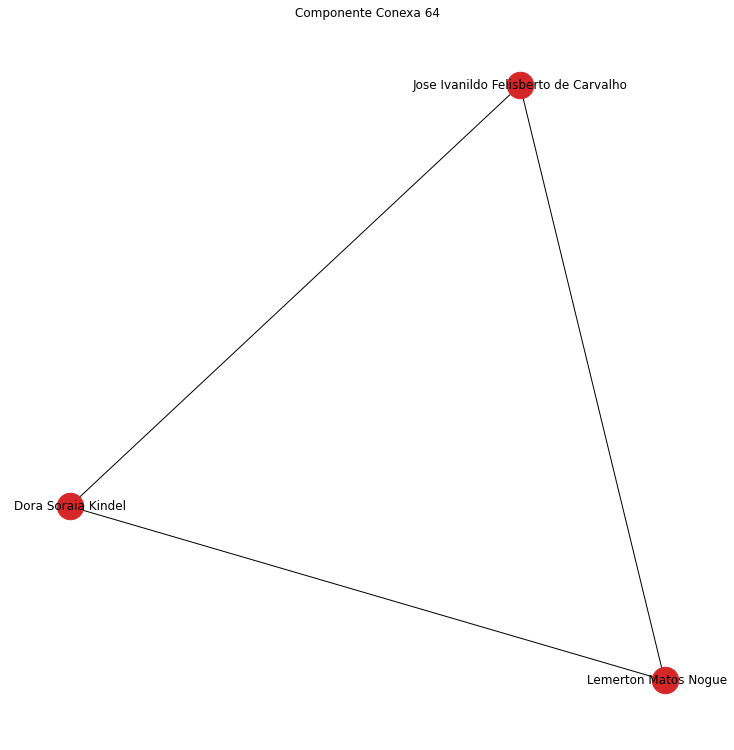

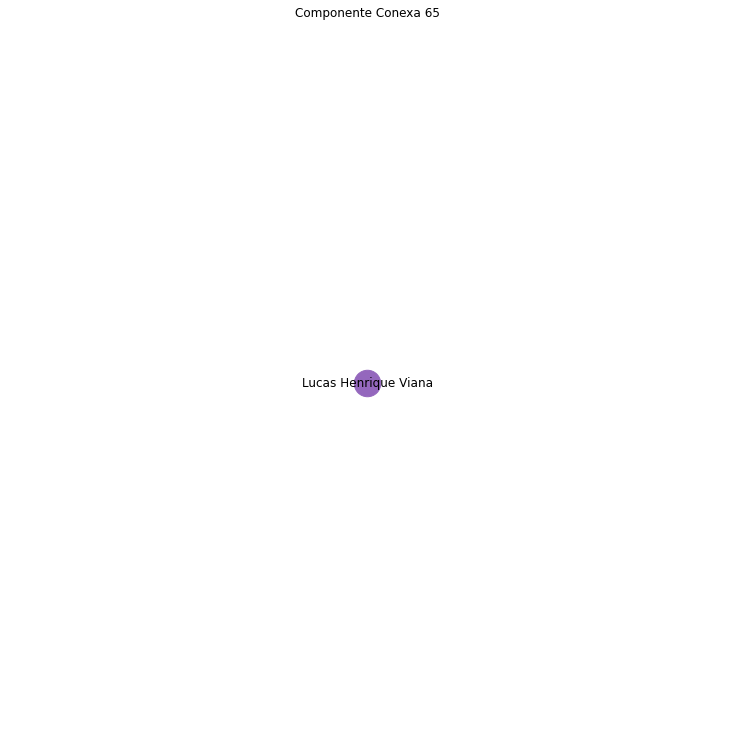

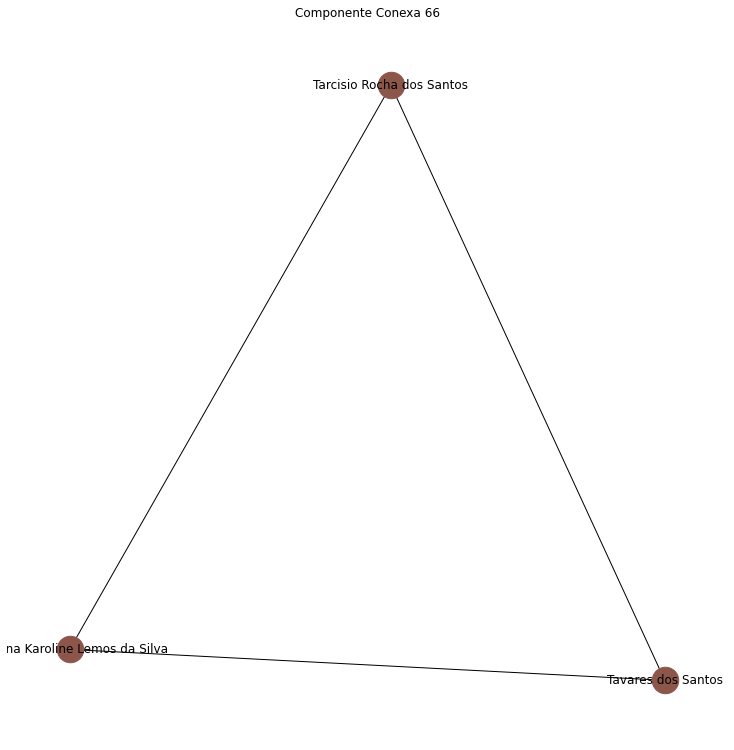

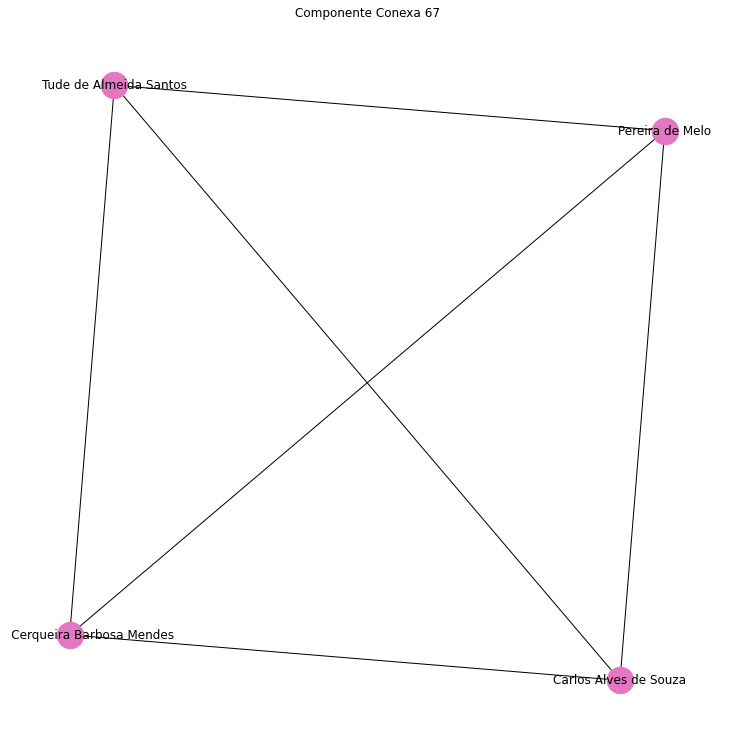

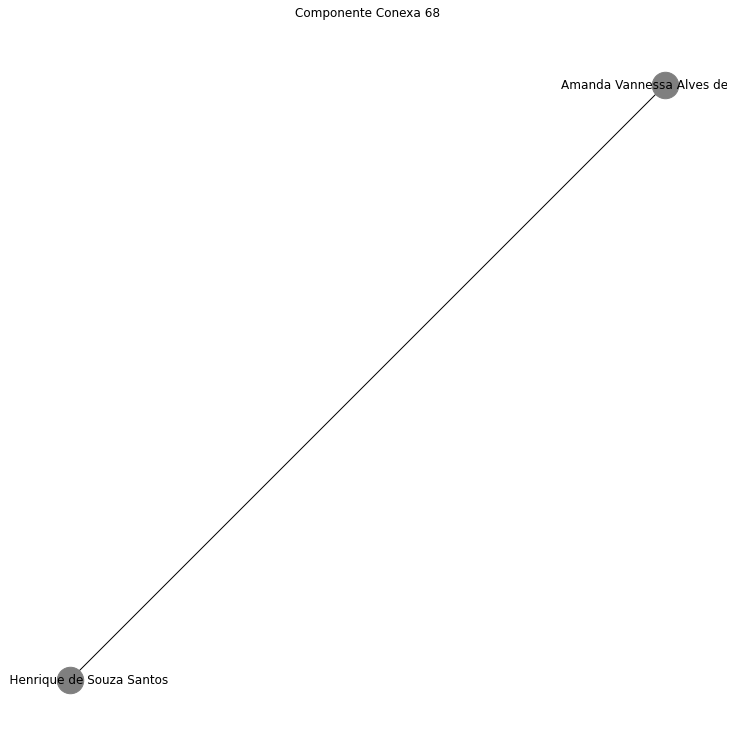

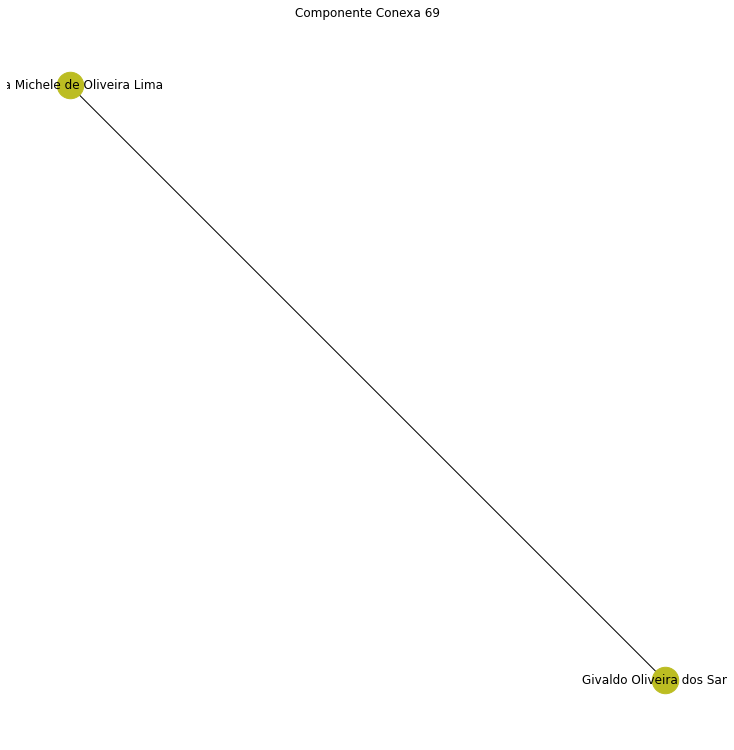

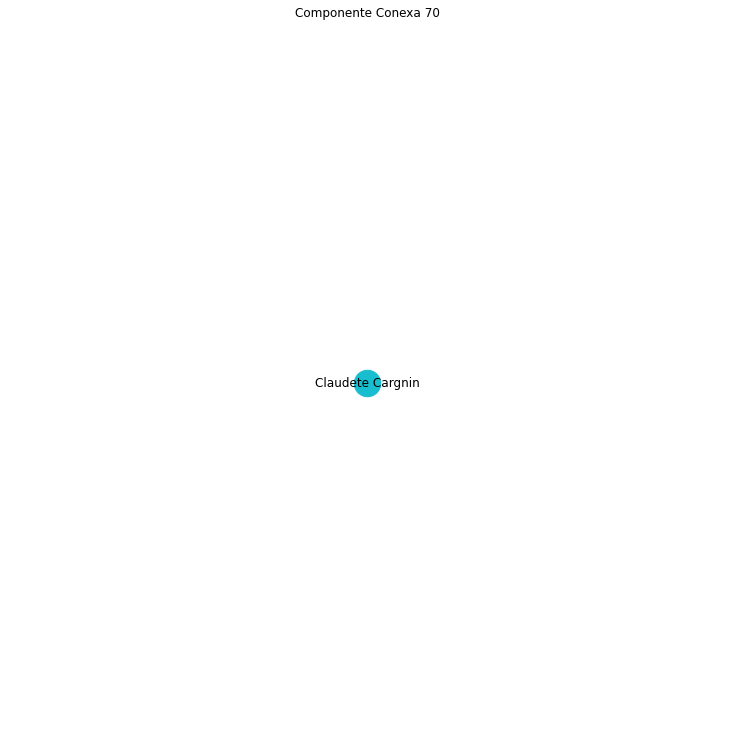

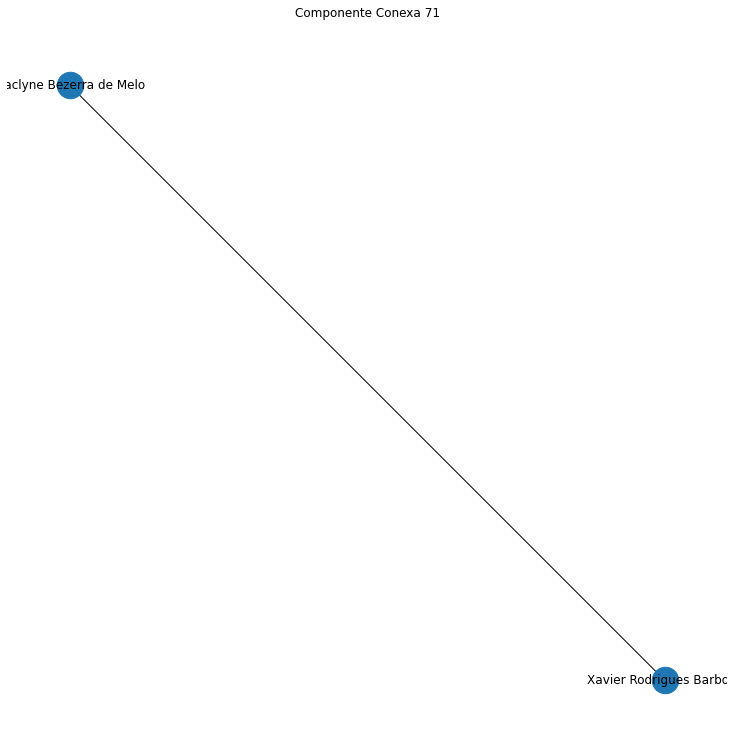

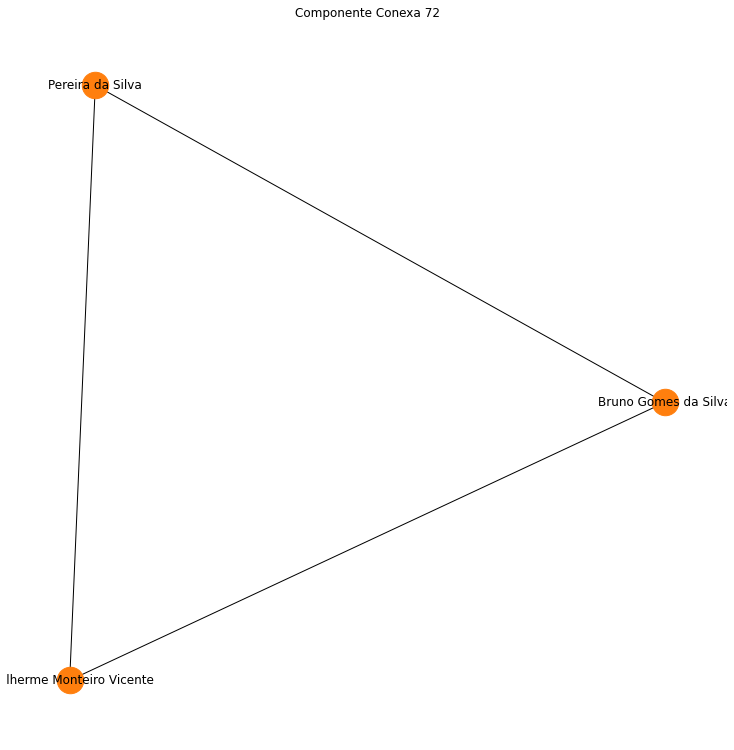

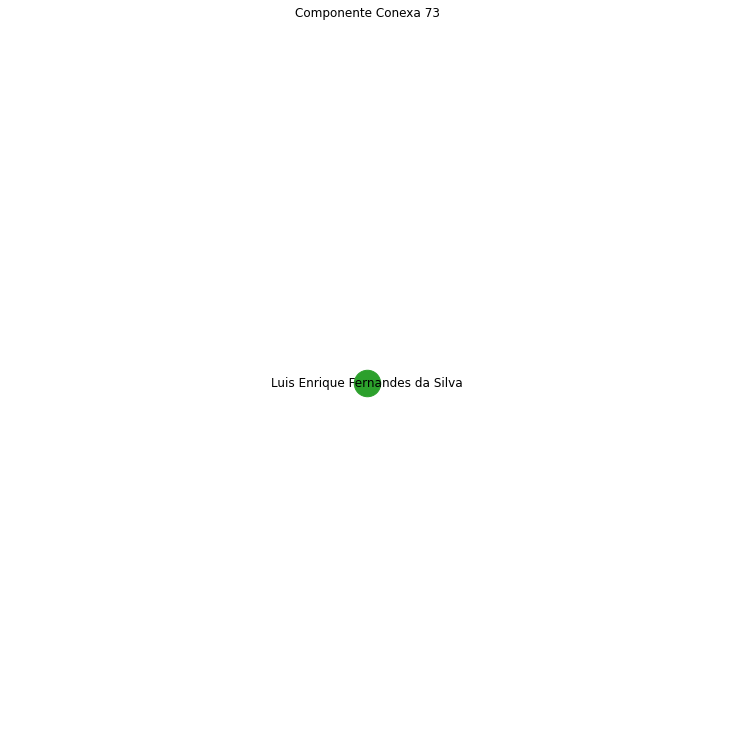

In [215]:
# Encontrando componentes conexas
componentes_conexas = list(nx.connected_components(G))

# Se quiser visualizar cada componente conexa separadamente
for i, component in enumerate(componentes_conexas):
    # Criando um subgrafo para cada componente conexa
    subgraph = G.subgraph(component)

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(subgraph)  # Pode usar outro layout se preferir
    nx.draw(subgraph, pos, with_labels=True, node_color=f"C{i}", node_size=700)
    plt.title(f"Componente Conexa {i + 1}")
    plt.show()

In [216]:
# Calculando centralidades
centralidade_grau = nx.degree_centrality(G)
centralidade_intermediacao = nx.betweenness_centrality(G)
centralidade_proximidade = nx.closeness_centrality(G)

# Identificando os nós mais influentes com base em cada medida de centralidade
nó_mais_influente_grau = max(centralidade_grau, key=centralidade_grau.get)
nó_mais_influente_intermediacao = max(centralidade_intermediacao, key=centralidade_intermediacao.get)
nó_mais_influente_proximidade = max(centralidade_proximidade, key=centralidade_proximidade.get)

print(f"Nó mais influente por centralidade de grau: {nó_mais_influente_grau}")
print(f"Nó mais influente por centralidade de intermediação: {nó_mais_influente_intermediacao}")
print(f"Nó mais influente por centralidade de proximidade: {nó_mais_influente_proximidade}")

Nó mais influente por centralidade de grau: Lins Barbosa de Paiva Almeida
Nó mais influente por centralidade de intermediação: Liliane Maria Teixeira Lima de Carvalho
Nó mais influente por centralidade de proximidade: Lins Barbosa de Paiva Almeida


# Seção de Identificação de Tópicos

In [217]:
pip install PyPDF2 gensim nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
import PyPDF2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import nltk

# Baixe as stopwords do NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def extract_summaries_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        summaries = []
        current_summary = ""
        recording = False
        for page_num, page in enumerate(reader.pages):
            text = page.extract_text()
            if not text:  # Se a página não contiver texto, imprimir uma mensagem de aviso.
                print(f"Aviso: A página {page_num} parece estar vazia.")
            for line in text.split('\n'):
                stripped_line = line.strip()  # Remove espaços em branco do início e do final
                if stripped_line.lower().startswith("resumo"):
                    recording = True
                    current_summary = line + "\n"
                elif stripped_line.lower().startswith("palavras") and recording:
                    current_summary += line + "\n"
                    summaries.append(current_summary)
                    current_summary = ""  # Reset the current summary
                    recording = False
                elif recording:
                    current_summary += line + "\n"
            # Isso irá imprimir o conteúdo que está sendo capturado como resumo para depuração.
            if recording:
                print(f"Gravando resumo na página {page_num}: {current_summary}")

        if not summaries:
            print("Nenhum resumo foi extraído. Verifique o formato dos resumos no PDF.")

        return summaries

# Adicione as palavras que você quer excluir à lista de stopwords
stop_words = set(stopwords.words('portuguese') + ['palavras', 'resumo', 'chave'])

# Função para limpar e tokenizar o texto
def preprocess_text(text):
    # Verifique se o texto é uma string
    if not isinstance(text, str):
        raise ValueError("O texto fornecido não é uma string válida.")

    # Tokenize o texto
    tokens = word_tokenize(text)
    # Converte para minúsculo
    tokens = [token.lower() for token in tokens]
    # Remove pontuações e números
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if not word in stop_words]
    return tokens

# Agora, quando você pré-processar seus resumos, as palavras 'palavras', 'resumo' e 'chave' serão excluídas.
# preprocessed_summaries = [preprocess_text(summary) for summary in summaries]

In [22]:
# Testar a função para ver o que ela retorna
summaries = extract_summaries_from_pdf(pdf_path)
print(f"Total de resumos extraídos: {len(summaries)}")

Gravando resumo na página 30: resumo, palavras -chave, pergunta da pesquisa, objetivos e considerações finais.  

Gravando resumo na página 31: resumo, palavras -chave, pergunta da pesquisa, objetivos e considerações finais.  
 
 Cenário das Pesquisas envolvendo Educação 
Financeira e Formação de Professores nas 
Edições do EBRAPEM (XX ao XXIV)  VIII EPEM –  
Encontro Pernambucano de Educação 
Matemática  
21 a 23 de abril de 2022   
 
Anais do VIII EPEM – Encontro Pernambucano de Educação Matemática. Caruaru - Pernambuco, Brasil, 2022  
8 
 
Figura 1 - Palavras mais evocadas durantes as produções  
 
Fonte: Autores, 2021  
 
Com relação a nuvem de palavras apresentada na Figura 1 verifica -se que as palavras 
mais evocadas foram: matemática ( f=52), professor ( f=46), pesquisa ( f=26), licenciatura 
(f=26), financeiro ( f=23), curso ( f=23) e formação inicial (f=17) . Isso pode demonstrar  que 
estás pesquisas estavam relacionadas  com esses termos, e que é importante uma maior 
discu

Multiple definitions in dictionary at byte 0x7a for key /Subtype
Multiple definitions in dictionary at byte 0x16b for key /Subtype
Multiple definitions in dictionary at byte 0x24e for key /Subtype
Multiple definitions in dictionary at byte 0x374 for key /Subtype
Multiple definitions in dictionary at byte 0x4b11 for key /Subtype
Multiple definitions in dictionary at byte 0x7d for key /Subtype
Multiple definitions in dictionary at byte 0x16b for key /Subtype
Multiple definitions in dictionary at byte 0xcff for key /Subtype
Multiple definitions in dictionary at byte 0xd2e for key /BBox
Multiple definitions in dictionary at byte 0xd3e for key /Subtype
Multiple definitions in dictionary at byte 0x13d5 for key /Subtype
Multiple definitions in dictionary at byte 0x4ce3 for key /Subtype
Multiple definitions in dictionary at byte 0x7d for key /Subtype
Multiple definitions in dictionary at byte 0x167 for key /Subtype
Multiple definitions in dictionary at byte 0x552 for key /Subtype
Multiple defi

Gravando resumo na página 1394: Resumo  
O objetivo desta oficina é introduzir, com um recurso lúdico, a prática dialética das situações didáticas, 
propostas por Guy Brousseau. Na intenção de um primeiro contato com a construção colaborativa de 
um “saber -fazer”, o jogo “Corrida ao 20” é o exemplo  ideal para a promoção de um engajamento à 
lógica do diálogo em sala de aula. Além disso, quando trazemos variações do jogo, podemos 
desestruturar os modelos formulados para a primeira situação, fazendo com que os alunos elaborem, 
conjuntamente, representa ções mais apropriadas para a situação em questão. A essência conversativa -
argumentativa de muitas das etapas de uma situação didática é também discutida e enfatizada como 
prerrogativa da oficina, e como elemento fundamental ao funcionamento da mesma.  
Palav ras-chave: situação  didática ; dialética; jogo matemático; problema; interação.  
INTRODUÇÃO  
 Em uma das reuniões semanais com o nosso professor supervisor do Programa 
Insti

In [343]:
# Palavras que deseja remover
words_to_remove = ['alunos', 'estudantes', 'atividades', 'Resumos', 'RESUMOS',
                   'Resumo', 'RESUMO', 'Palavras', 'Palavra', 'palavras', 
                   'chave','chaves', '-', ':', 'matemáticas', 'matemática', 'Matemáticas','Matemática', 
                   'Ensinos', 'Ensino', 'ensinos', 'ensino', 'sobre', 
                   'aprendizagem', 'educação', 'objetivos', 'objetivo', 'além',
                   'trabalhos','trabalho',  'estudos', 'estudo', 'partir', 
                   'pesquisas', 'pesquisa', 'educação', 'aulas','aula', 
                   'professores', 'professor', 'anos']

# Função para remover palavras específicas de um texto
def remove_words(text, words):
    for word in words:
        text = text.replace(word, '')
    return text

# Aplicando a função em todos os resumos
summaries = [remove_words(summary, words_to_remove) for summary in summaries]

In [281]:
from gensim.similarities import MatrixSimilarity

In [347]:
# Função para pré-processar os resumos
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords.words('portuguese')]
    return tokens

# Pré-processar todos os resumos
preprocessed_summaries = [preprocess_text(summary) for summary in summaries]

# Criar um dicionário e um corpus para a modelagem de tópicos
dictionary = corpora.Dictionary(preprocessed_summaries)
corpus = [dictionary.doc2bow(text) for text in preprocessed_summaries]

# Aplicar a modelagem de tópicos usando o modelo LDA
lda_model = models.LdaModel(corpus, num_topics=8, id2word=dictionary, passes=15)

# Função para calcular similaridade entre tópicos
def calculate_similarity(lda_model, corpus):
    # Cria a matriz de similaridade a partir do corpus LDA
    similarity_matrix = MatrixSimilarity(lda_model[corpus])
    return similarity_matrix

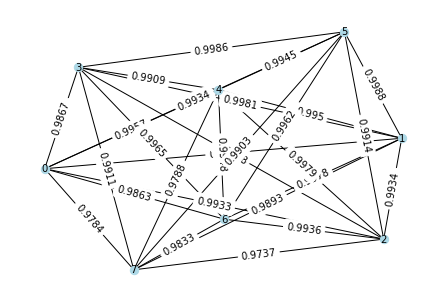

In [355]:
import numpy as np

# Obter a distribuição de palavras para cada tópico
word_distributions = [lda_model.get_topic_terms(topicid) for topicid in range(num_topics)]

# Cálculo da similaridade entre as distribuições de palavras dos tópicos
for i in range(num_topics):
    for j in range(num_topics):
        words_i = [prob for _, prob in word_distributions[i]]
        words_j = [prob for _, prob in word_distributions[j]]
        similarity = np.dot(words_i, words_j) / (np.linalg.norm(words_i) * np.linalg.norm(words_j))
        similarity_matrix[i][j] = similarity

# Criar um grafo de tópicos usando NetworkX
G = nx.Graph()

# Adicionar nós ao grafo para cada tópico
for i in range(num_topics):
    G.add_node(i, label=f"Topic {i}")

# Adicionar arestas baseadas na similaridade dos tópicos
for i in range(num_topics):
    for j in range(i + 1, num_topics):
        weight = round(similarity_matrix[i][j],4)
        if weight > 0.1:  # Defina um limiar de similaridade para a criação de uma aresta
            G.add_edge(i, j, weight=weight)

# Desenhar o grafo
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, with_labels=True, node_size=70, node_color='lightblue', font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [350]:
# Para cada tópico, imprima as palavras mais significativas
num_words = 10  # O número de palavras a serem exibidas por tópico
for i, topic in lda_model.show_topics(num_topics=lda_model.num_topics, num_words=num_words, formatted=False):
    topic_words = [word for word, prob in topic]
    print(f'Tópico {i}: {"; ".join(topic_words)}')


Tópico 0: educação; estatística; área; formação; processo; sala; probabilidade; letramento; conhecimentos; curso
Tópico 1: formação; curso; etno; s; ansiedade; dados; resultados; educação; experiência; médio
Tópico 2: problemas; médio; probabilidade; financeira; educação; bncc; temática; apresentar; formação; significados
Tópico 3: educação; recursos; problemas; presente; abordagem; didáticos; fundamental; campo; práticas; processo
Tópico 4: s; digitais; educação; remoto; uso; dados; digital; tecnologias; recursos; utilização
Tópico 5: formação; jogos; desenvolvimento; estágio; curso; digitais; resultados; forma; meio; problemas
Tópico 6: educação; função; resultados; didático; história; atividade; formação; variação; tecnologias; avaliação
Tópico 7: jogo; conceitos; uso; função; processo; ano; conteúdo; sala; proposta; desenvolvimento


# Medição da Similaridade entre Textos

In [23]:
# Testar a função para ver o que ela retorna
summaries_2 = extract_summaries_from_pdf(pdf_path)
print(f"Total de resumos extraídos: {len(summaries)}")

Gravando resumo na página 30: resumo, palavras -chave, pergunta da pesquisa, objetivos e considerações finais.  

Gravando resumo na página 31: resumo, palavras -chave, pergunta da pesquisa, objetivos e considerações finais.  
 
 Cenário das Pesquisas envolvendo Educação 
Financeira e Formação de Professores nas 
Edições do EBRAPEM (XX ao XXIV)  VIII EPEM –  
Encontro Pernambucano de Educação 
Matemática  
21 a 23 de abril de 2022   
 
Anais do VIII EPEM – Encontro Pernambucano de Educação Matemática. Caruaru - Pernambuco, Brasil, 2022  
8 
 
Figura 1 - Palavras mais evocadas durantes as produções  
 
Fonte: Autores, 2021  
 
Com relação a nuvem de palavras apresentada na Figura 1 verifica -se que as palavras 
mais evocadas foram: matemática ( f=52), professor ( f=46), pesquisa ( f=26), licenciatura 
(f=26), financeiro ( f=23), curso ( f=23) e formação inicial (f=17) . Isso pode demonstrar  que 
estás pesquisas estavam relacionadas  com esses termos, e que é importante uma maior 
discu

Multiple definitions in dictionary at byte 0x7a for key /Subtype
Multiple definitions in dictionary at byte 0x16b for key /Subtype
Multiple definitions in dictionary at byte 0x24e for key /Subtype
Multiple definitions in dictionary at byte 0x374 for key /Subtype
Multiple definitions in dictionary at byte 0x4b11 for key /Subtype
Multiple definitions in dictionary at byte 0x7d for key /Subtype
Multiple definitions in dictionary at byte 0x16b for key /Subtype
Multiple definitions in dictionary at byte 0xcff for key /Subtype
Multiple definitions in dictionary at byte 0xd2e for key /BBox
Multiple definitions in dictionary at byte 0xd3e for key /Subtype
Multiple definitions in dictionary at byte 0x13d5 for key /Subtype
Multiple definitions in dictionary at byte 0x4ce3 for key /Subtype
Multiple definitions in dictionary at byte 0x7d for key /Subtype
Multiple definitions in dictionary at byte 0x167 for key /Subtype
Multiple definitions in dictionary at byte 0x552 for key /Subtype
Multiple defi

Gravando resumo na página 1394: Resumo  
O objetivo desta oficina é introduzir, com um recurso lúdico, a prática dialética das situações didáticas, 
propostas por Guy Brousseau. Na intenção de um primeiro contato com a construção colaborativa de 
um “saber -fazer”, o jogo “Corrida ao 20” é o exemplo  ideal para a promoção de um engajamento à 
lógica do diálogo em sala de aula. Além disso, quando trazemos variações do jogo, podemos 
desestruturar os modelos formulados para a primeira situação, fazendo com que os alunos elaborem, 
conjuntamente, representa ções mais apropriadas para a situação em questão. A essência conversativa -
argumentativa de muitas das etapas de uma situação didática é também discutida e enfatizada como 
prerrogativa da oficina, e como elemento fundamental ao funcionamento da mesma.  
Palav ras-chave: situação  didática ; dialética; jogo matemático; problema; interação.  
INTRODUÇÃO  
 Em uma das reuniões semanais com o nosso professor supervisor do Programa 
Insti

In [360]:
# Importações necessárias
import nltk
from nltk.corpus import stopwords
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\marci\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


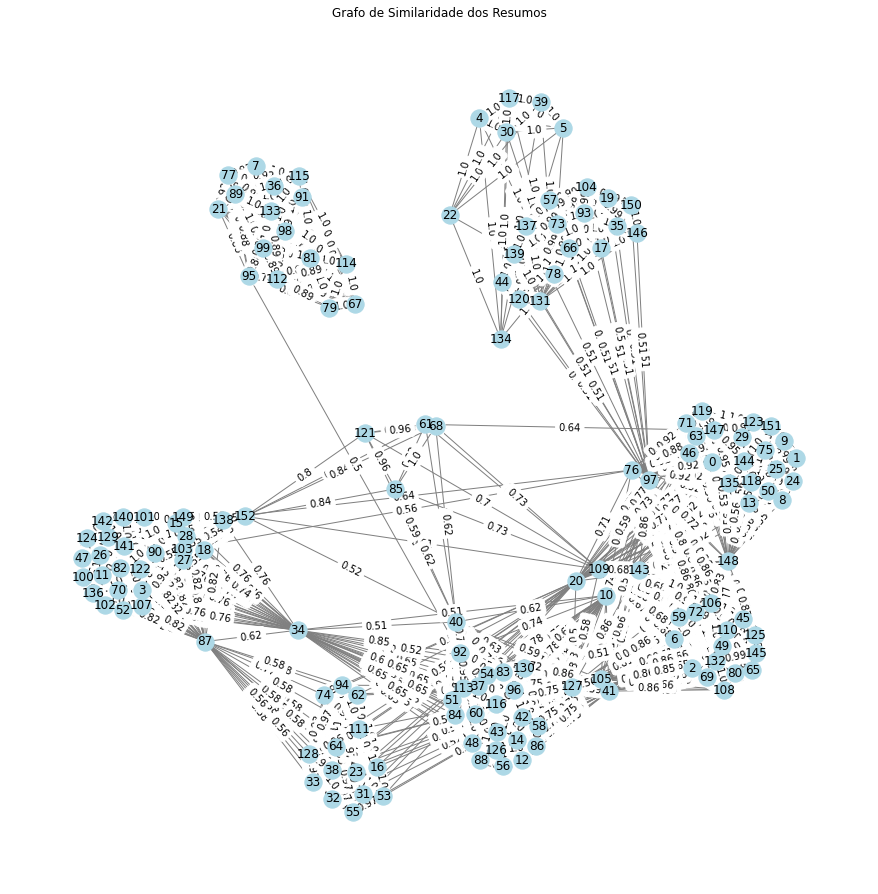

In [361]:
# Certifique-se de ter baixado as stopwords em português
nltk.download('stopwords')
nltk.download('rslp')  # Stemmer para português

# Pré-processamento dos resumos em português
stop_words_pt = set(stopwords.words('portuguese'))
stemmer = nltk.stem.RSLPStemmer()  # Stemmer para português

def preprocess(text):
    return [stemmer.stem(word) for word in nltk.word_tokenize(text.lower(), language='portuguese') if word.isalpha() and word not in stop_words_pt]

processed_summaries = [preprocess(summary) for summary in summaries_2]

# Construção do Corpus e do Dicionário
dictionary = Dictionary(processed_summaries)
corpus = [dictionary.doc2bow(text) for text in processed_summaries]

# Modelagem de Tópicos com LDA
num_topics = 10  # Defina o número de tópicos
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Cálculo da Similaridade de Cosseno
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Inicialização da Matriz de Similaridade
similarity_matrix = np.zeros((len(summaries_2), len(summaries_2)))

for i in range(len(summaries_2)):
    for j in range(len(summaries_2)):
        vec_i = lda_model.get_document_topics(corpus[i], minimum_probability=0)
        vec_j = lda_model.get_document_topics(corpus[j], minimum_probability=0)
        vec_i = [prob for _, prob in vec_i]
        vec_j = [prob for _, prob in vec_j]
        similarity_matrix[i][j] = cosine_similarity(vec_i, vec_j)

# Criação do Grafo de Similaridade
G = nx.Graph()
for i in range(len(summaries_2)):
    for j in range(i, len(summaries_2)):
        if i != j and similarity_matrix[i][j] > 0.5:  # Ajuste o limiar de similaridade conforme necessário
            G.add_edge(i, j, weight= round(similarity_matrix[i][j],2))

# Visualização do Grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo de Similaridade dos Resumos")
plt.show()

In [25]:
# Importações necessárias
import spacy
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [26]:
# Carregamento do modelo de linguagem em português do spaCy
nlp = spacy.load('pt_core_news_sm')

# Certifique-se de ter baixado as stopwords em português
nltk.download('stopwords')

# Pré-processamento dos resumos em português
stop_words_pt = set(stopwords.words('portuguese'))

def preprocess(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words_pt]

processed_summaries = [preprocess(summary) for summary in summaries_2]

# Construção do Corpus e do Dicionário
dictionary = Dictionary(processed_summaries)
corpus = [dictionary.doc2bow(text) for text in processed_summaries]

# Modelagem de Tópicos com LDA
num_topics = 10  # Defina o número de tópicos
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Restante do código para cálculo de similaridade e criação do grafo...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


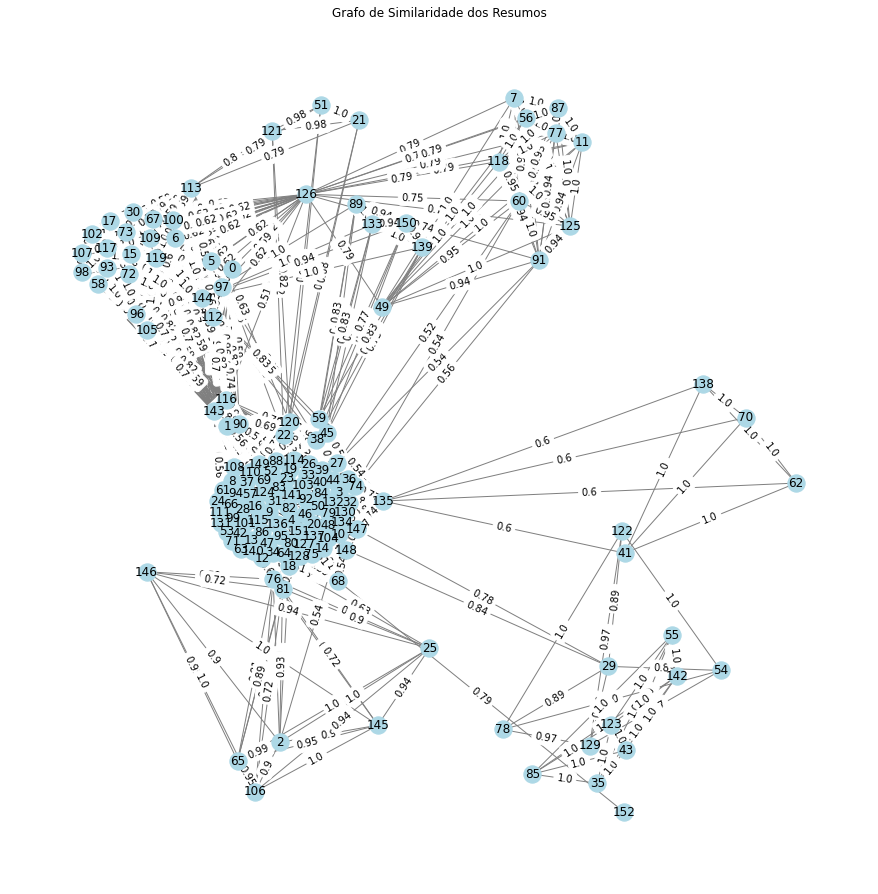

In [27]:
# Cálculo da Similaridade de Cosseno
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Inicialização da Matriz de Similaridade
similarity_matrix = np.zeros((len(summaries_2), len(summaries_2)))

for i in range(len(summaries_2)):
    for j in range(len(summaries_2)):
        vec_i = lda_model.get_document_topics(corpus[i], minimum_probability=0)
        vec_j = lda_model.get_document_topics(corpus[j], minimum_probability=0)
        vec_i = [prob for _, prob in vec_i]
        vec_j = [prob for _, prob in vec_j]
        similarity_matrix[i][j] = cosine_similarity(vec_i, vec_j)

# Criação do Grafo de Similaridade
G = nx.Graph()
for i in range(len(summaries_2)):
    for j in range(i, len(summaries_2)):
        if i != j and similarity_matrix[i][j] > 0.5:  # Ajuste o limiar de similaridade conforme necessário
            G.add_edge(i, j, weight= round(similarity_matrix[i][j],2))

# Visualização do Grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo de Similaridade dos Resumos")
plt.show()